# Importation des librairies

In [1]:
# OS
import sys

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight') 

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 
import pandas_profiling as pp

# SEABORN
import seaborn as sns

# SCHIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encodage des variables catégorielles nominales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # encodage des variables catégorielles ordinales
from sklearn.preprocessing import StandardScaler # normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # imputation
from sklearn.impute import KNNImputer 


# SCHIKIT-LEARN: MODELES
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet

# SCHIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # 
from sklearn.model_selection import cross_val_score # validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyper_paramètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE
from sklearn.pipeline import make_pipeline

## EVALUATION: COURBE ROC
from sklearn.metrics import auc # aire sous la courbe 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 


# Chargement des données

In [2]:
import os
hearth_data = pd.read_csv('C:/Users/cleme/Downloads/heart.csv')

# Description des données

In [3]:
Hearth = hearth_data.copy()

In [4]:
Hearth.head(5)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [5]:
Hearth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
Hearth["age"]

0      63
1      37
2      41
3      56
4      57
5      57
6      56
7      44
8      52
9      57
10     54
11     48
12     49
13     64
14     58
15     50
16     58
17     66
18     43
19     69
20     59
21     44
22     42
23     61
24     40
25     71
26     59
27     51
28     65
29     53
30     41
31     65
32     44
33     54
34     51
35     46
36     54
37     54
38     65
39     65
40     51
41     48
42     45
43     53
44     39
45     52
46     44
47     47
48     53
49     53
50     51
51     66
52     62
53     44
54     63
55     52
56     48
57     45
58     34
59     57
60     71
61     54
62     52
63     41
64     58
65     35
66     51
67     45
68     44
69     62
70     54
71     51
72     29
73     51
74     43
75     55
76     51
77     59
78     52
79     58
80     41
81     45
82     60
83     52
84     42
85     67
86     68
87     46
88     54
89     58
90     48
91     57
92     52
93     54
94     45
95     53
96     62
97     52
98     43
99     53


In [7]:
pp.ProfileReport(Hearth)

# Analyse exploratoire

In [8]:
duplicate_h = Hearth[Hearth.duplicated()]
duplicate_h

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1

In [9]:
Hearth = Hearth.drop(164, axis=0)

In [10]:
duplicate_h = Hearth[Hearth.duplicated()]
duplicate_h

Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []

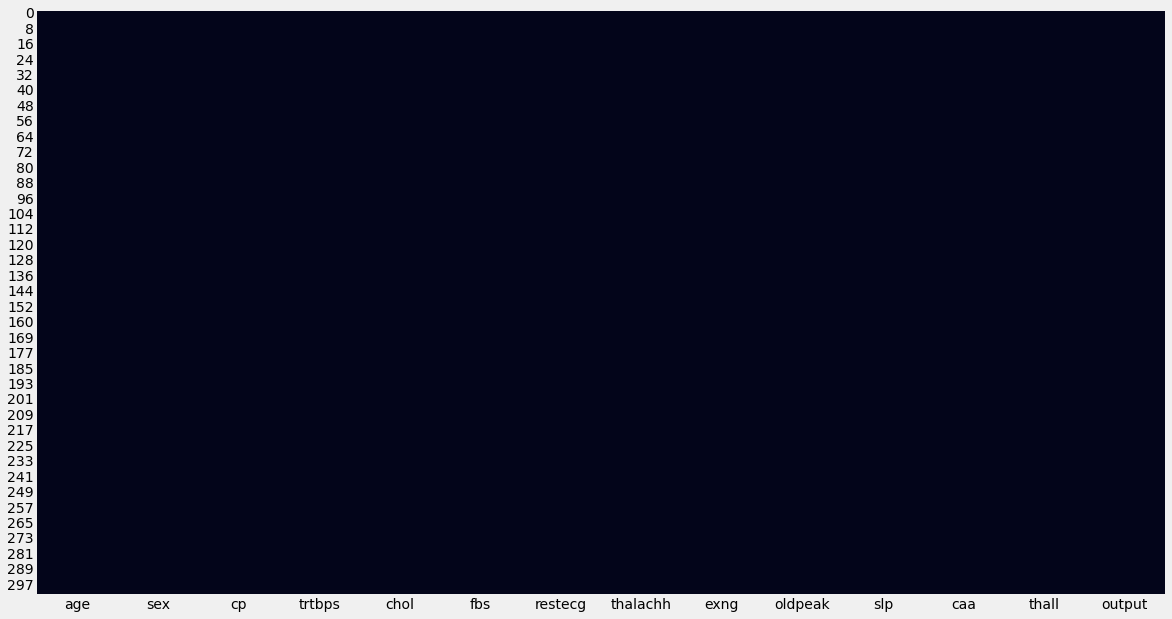

In [11]:
plt.figure(figsize=(18, 10))
sns.heatmap(Hearth.isna(), cbar=False)
plt.show()

In [12]:
n_samples, n_features = Hearth.shape
(Hearth.isna().sum()/n_samples).sort_values()

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

In [13]:
Hearth['age']

0      63
1      37
2      41
3      56
4      57
5      57
6      56
7      44
8      52
9      57
10     54
11     48
12     49
13     64
14     58
15     50
16     58
17     66
18     43
19     69
20     59
21     44
22     42
23     61
24     40
25     71
26     59
27     51
28     65
29     53
30     41
31     65
32     44
33     54
34     51
35     46
36     54
37     54
38     65
39     65
40     51
41     48
42     45
43     53
44     39
45     52
46     44
47     47
48     53
49     53
50     51
51     66
52     62
53     44
54     63
55     52
56     48
57     45
58     34
59     57
60     71
61     54
62     52
63     41
64     58
65     35
66     51
67     45
68     44
69     62
70     54
71     51
72     29
73     51
74     43
75     55
76     51
77     59
78     52
79     58
80     41
81     45
82     60
83     52
84     42
85     67
86     68
87     46
88     54
89     58
90     48
91     57
92     52
93     54
94     45
95     53
96     62
97     52
98     43
99     53


# Variable cible

In [14]:
Hearth["output"].value_counts()

1    164
0    138
Name: output, dtype: int64

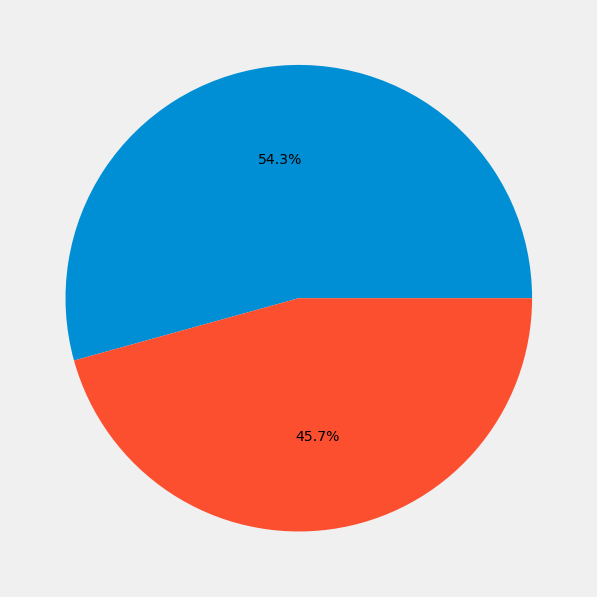

In [15]:
plt.figure(figsize=(18, 10))
plt.pie(Hearth["output"].value_counts(), autopct='%1.1f%%')
plt.show()

# Distribution des variables numériques

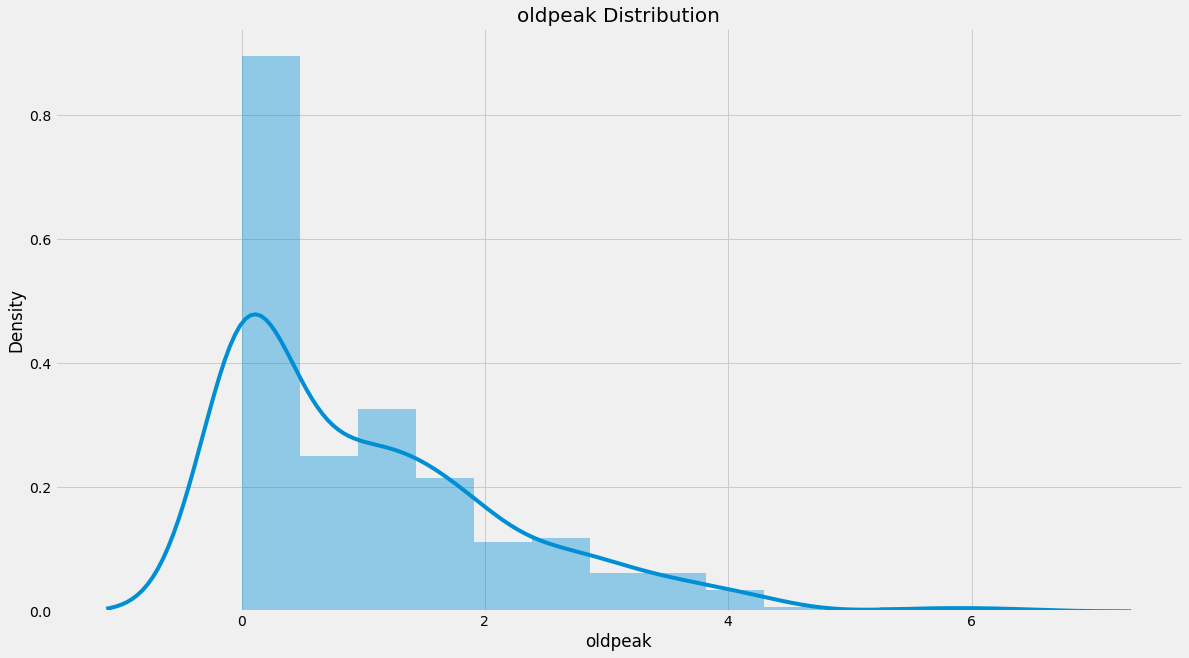

In [16]:
for feature in Hearth.select_dtypes('float64'):
    plt.figure(figsize=(18,10))
    sns.distplot(Hearth[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

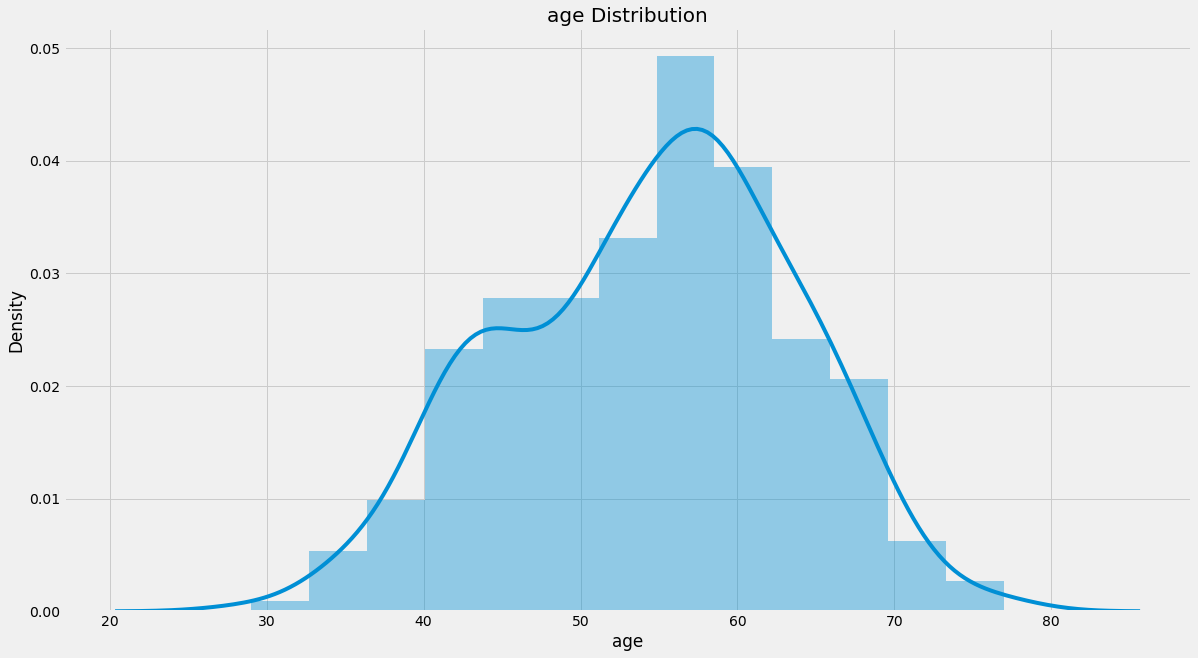

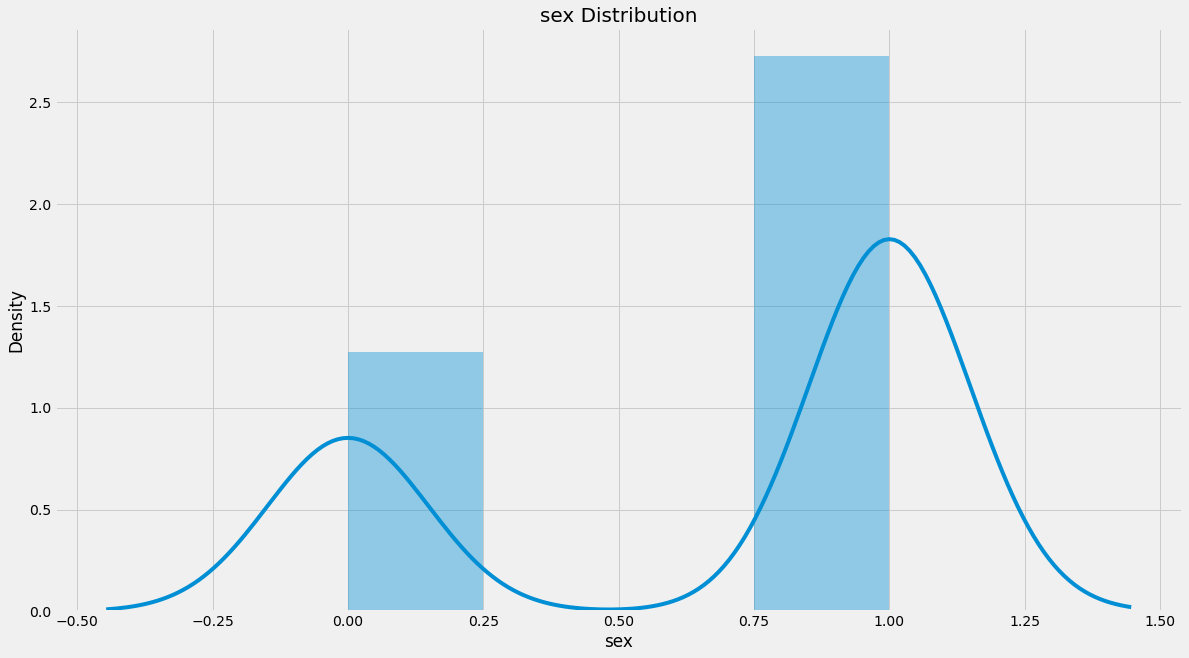

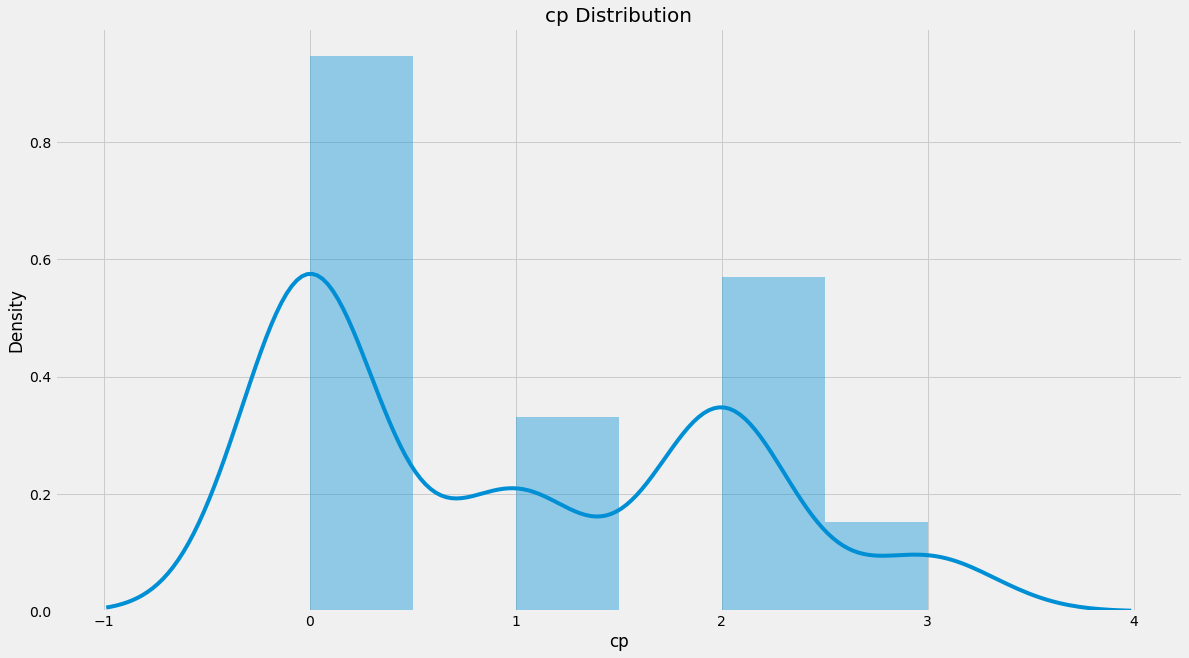

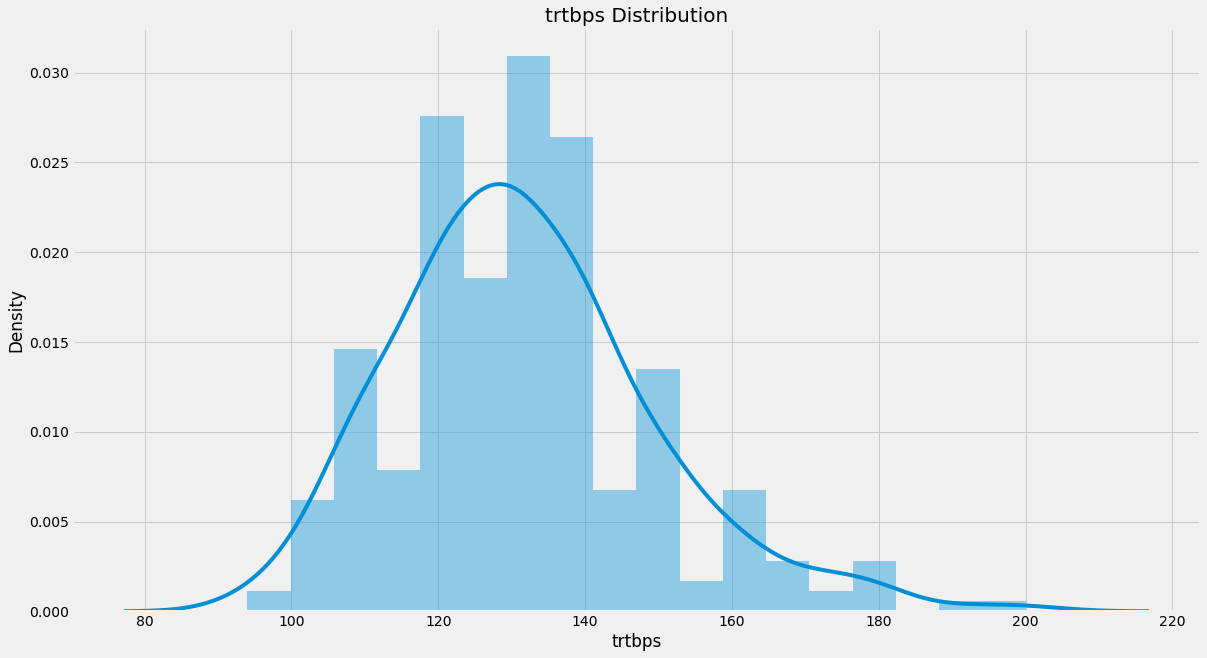

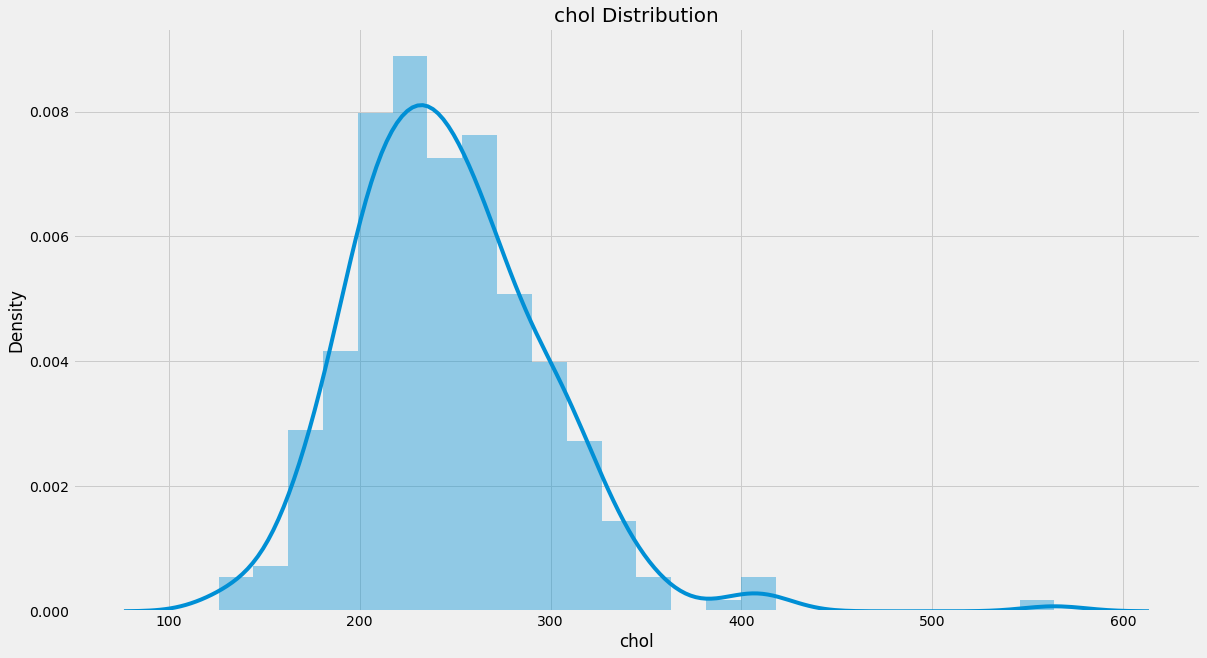

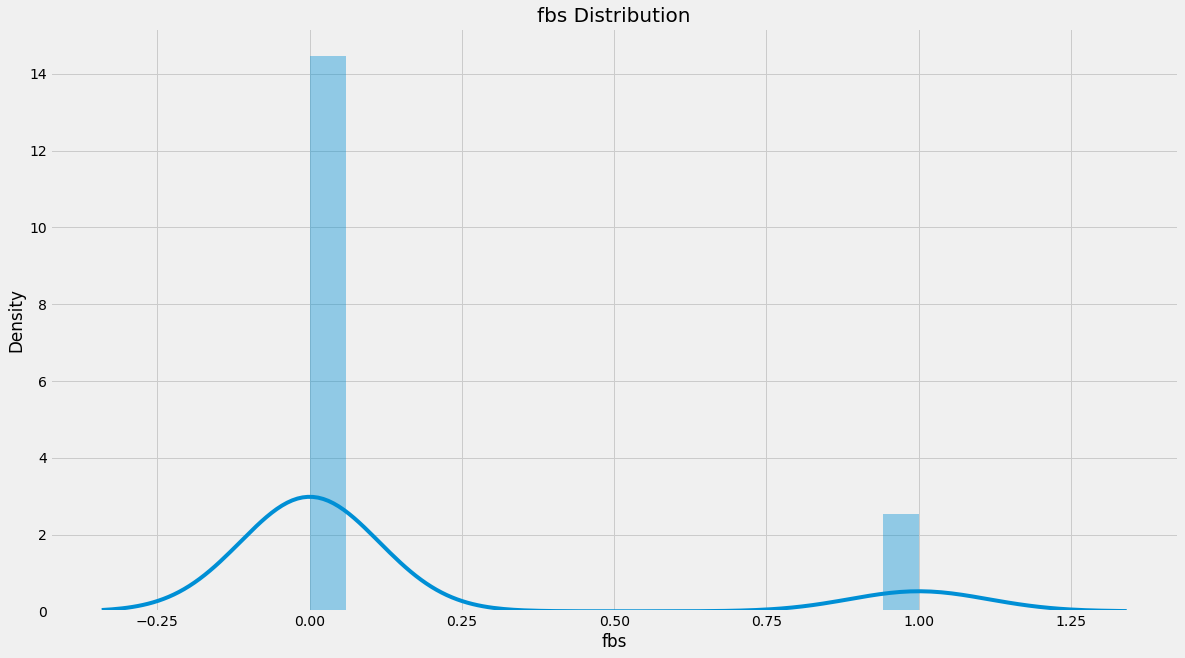

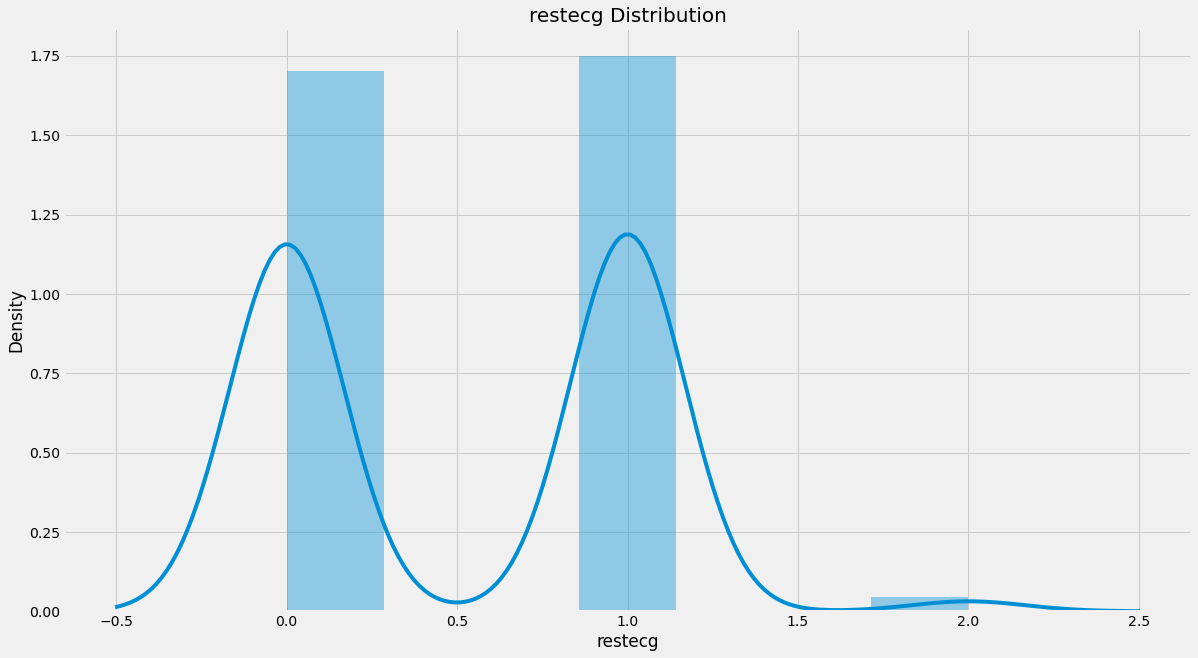

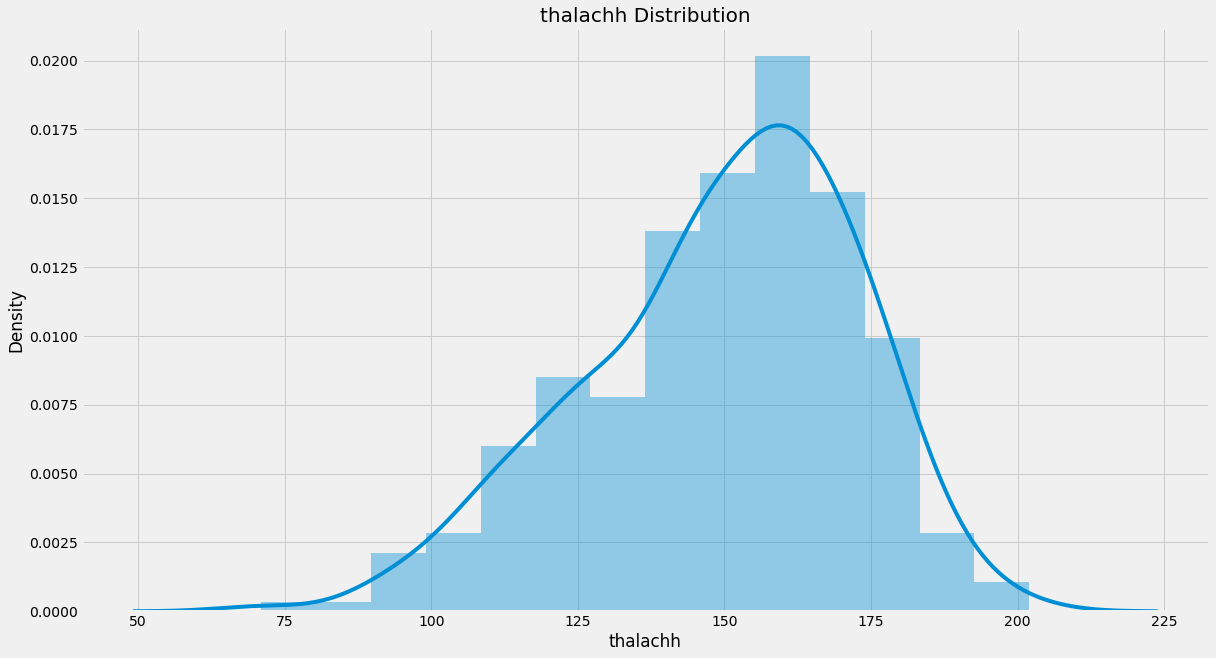

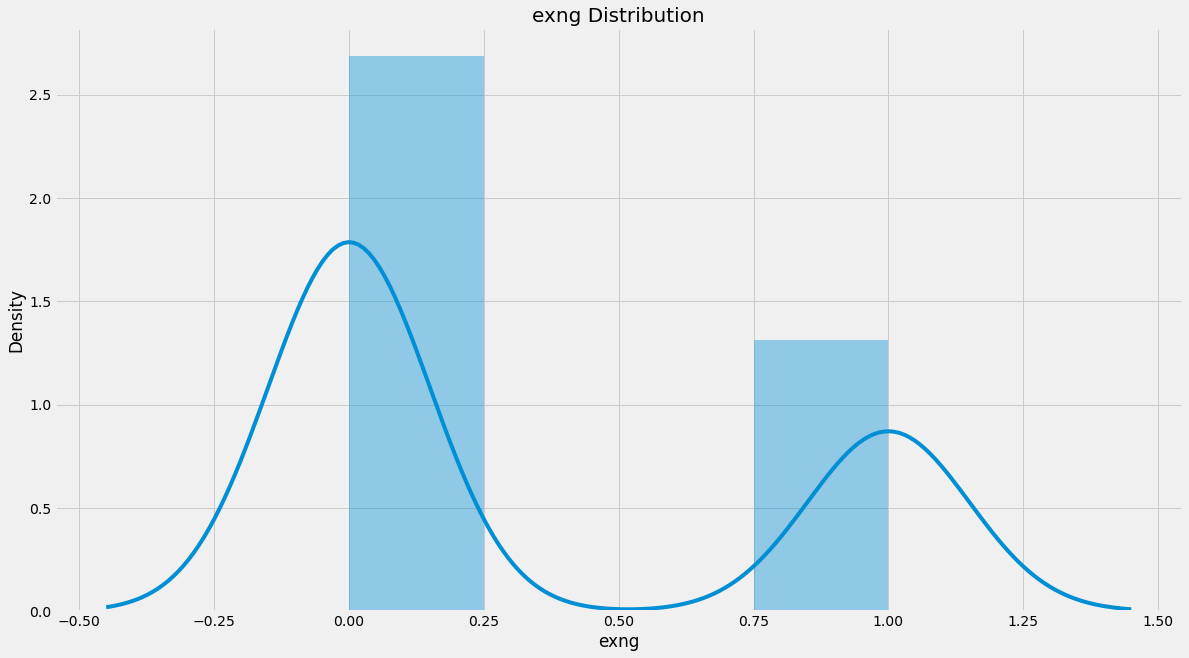

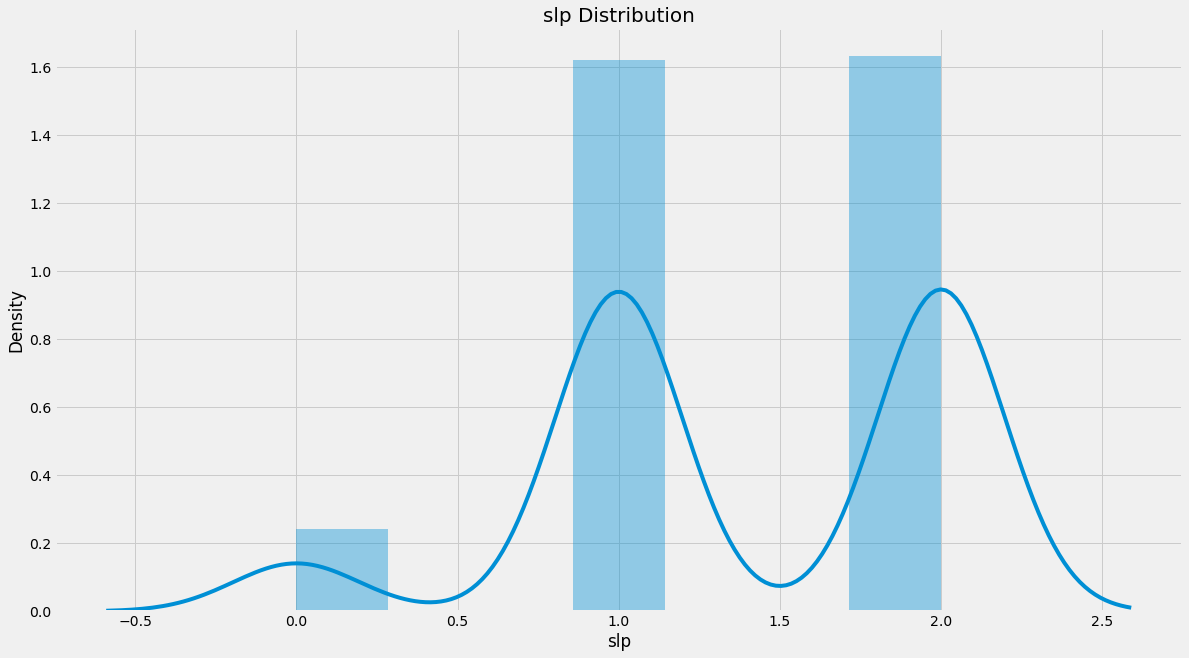

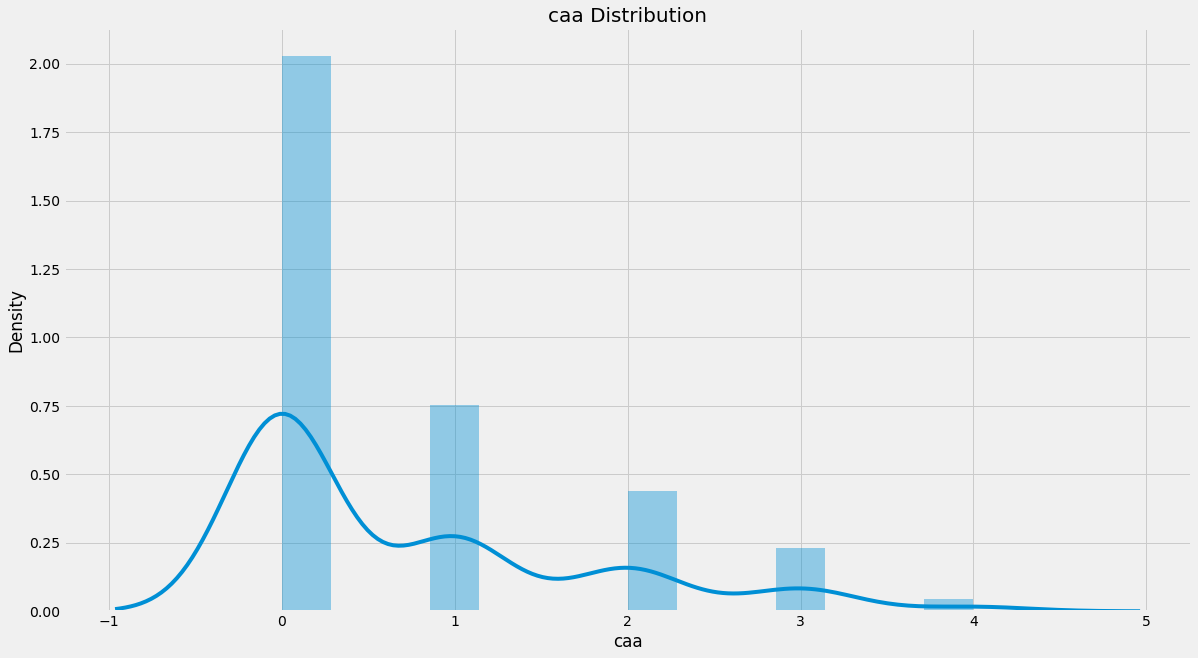

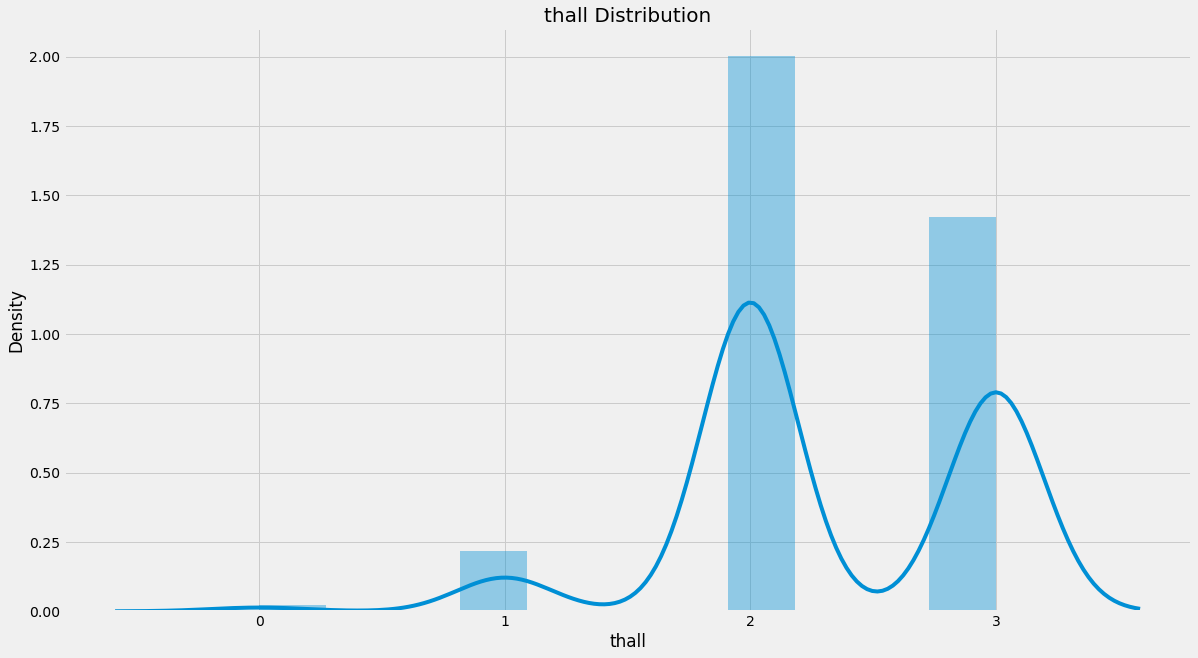

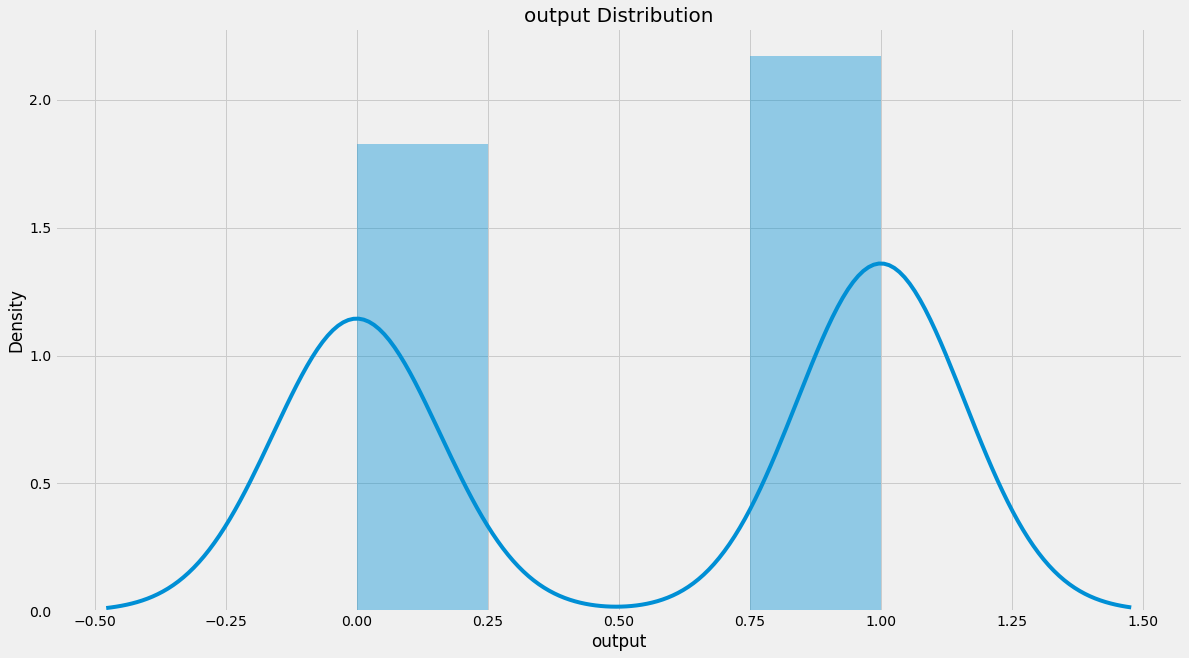

In [17]:
for feature in Hearth.select_dtypes('int64'):
    plt.figure(figsize=(18,10))
    sns.distplot(Hearth[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

# Corrélation

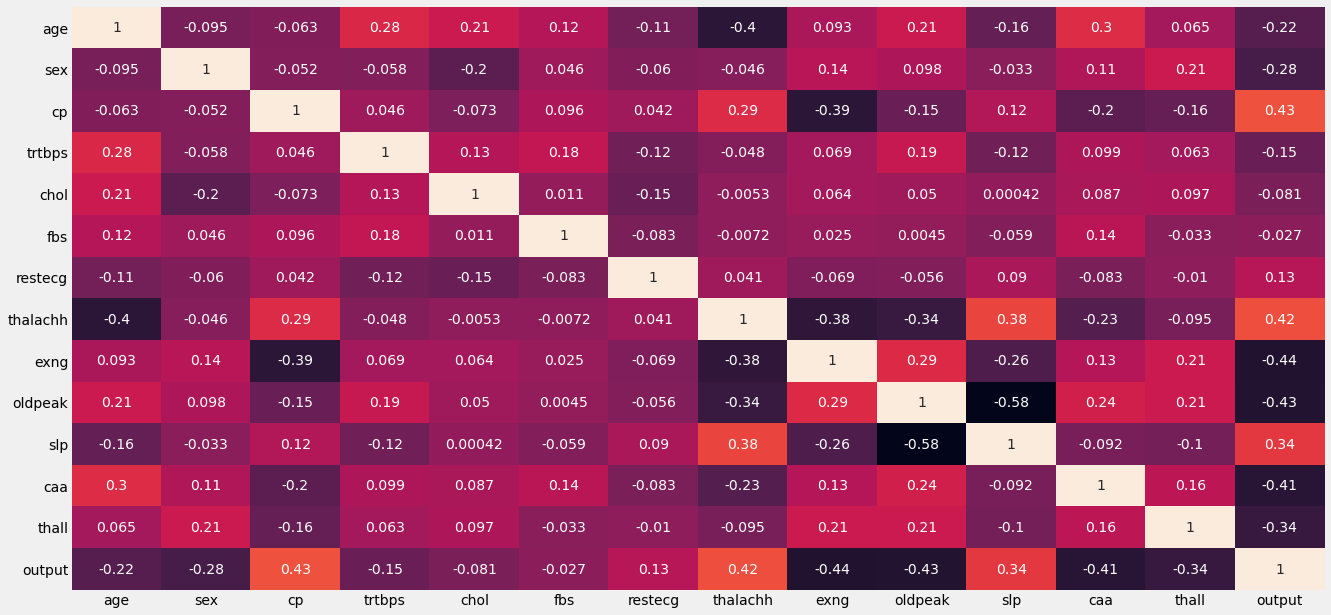

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(Hearth.corr(), annot=True, cbar=False) #
plt.show()

# Analyse bivariée

Text(0.5, 0, 'Leukocytes')

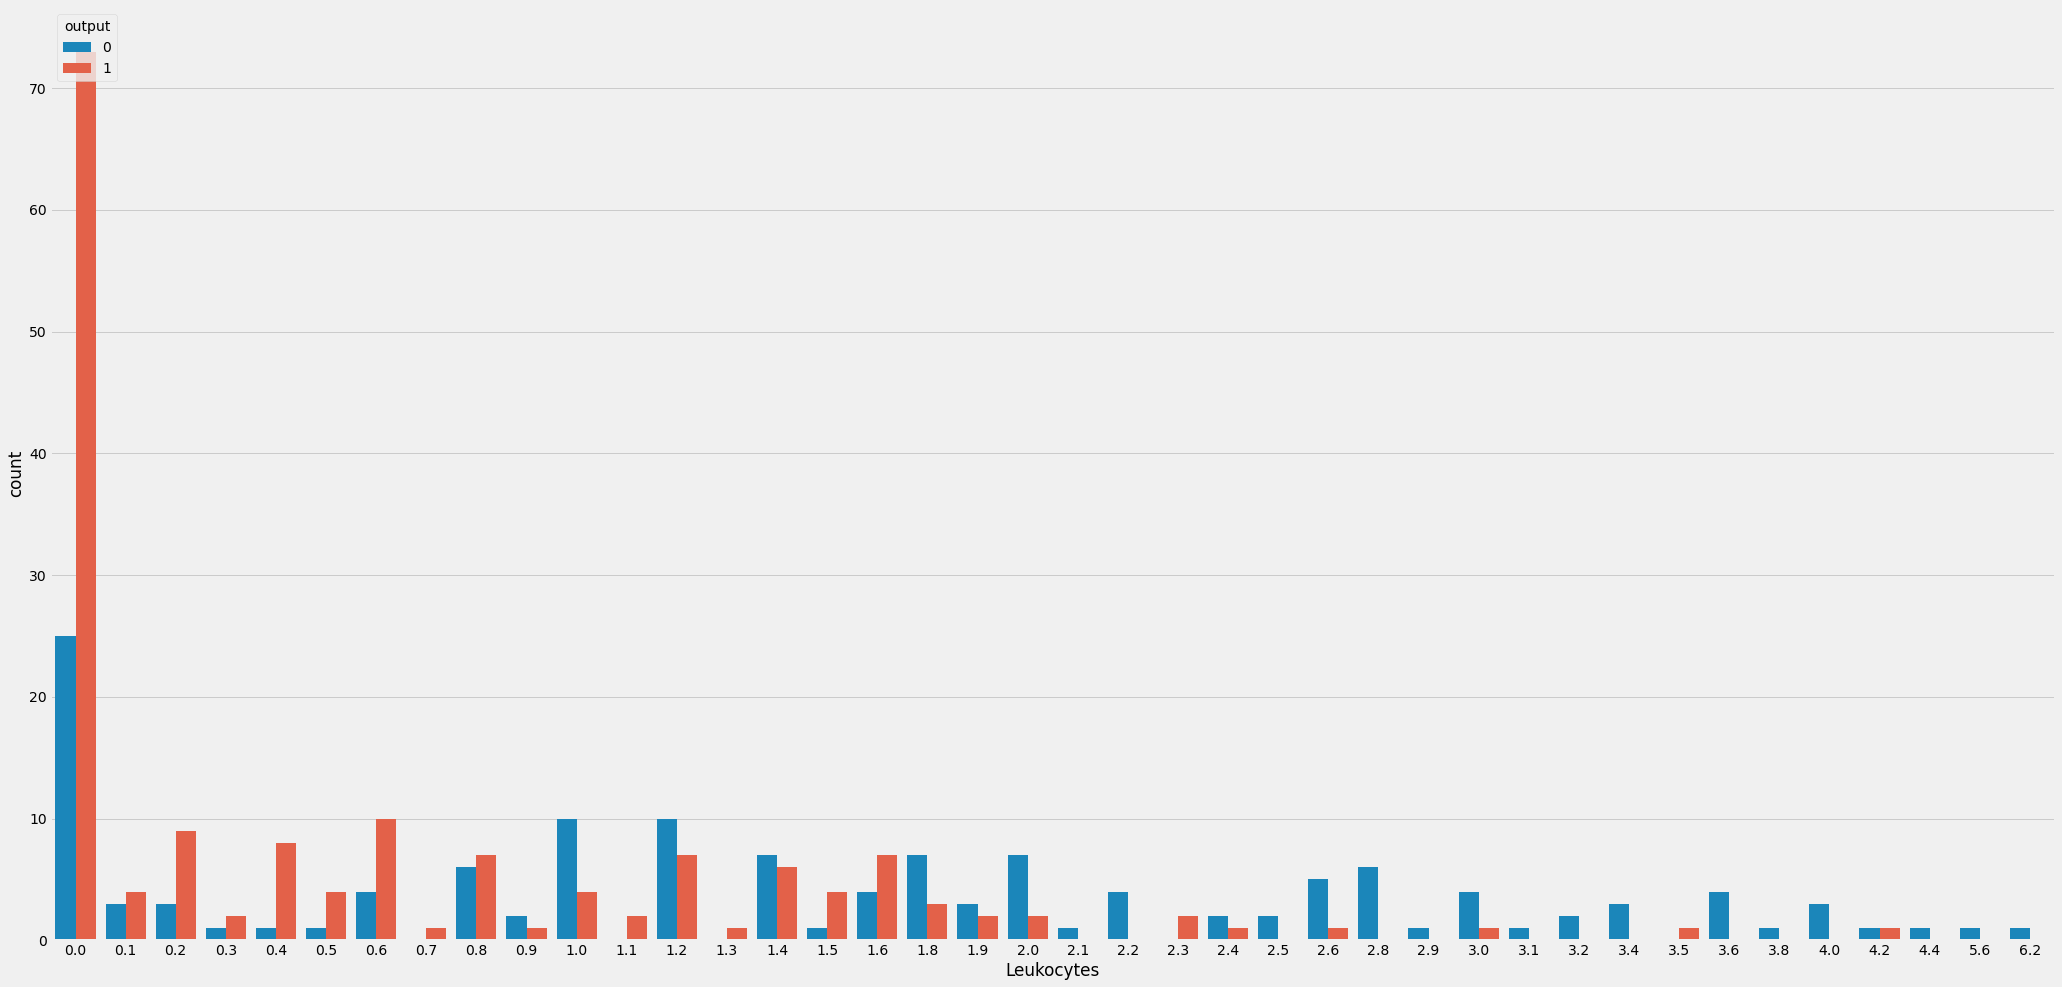

In [19]:
plt.figure(figsize=(32,16))
sns.countplot(x="oldpeak", data=Hearth, hue='output')
plt.xlabel("Leukocytes")

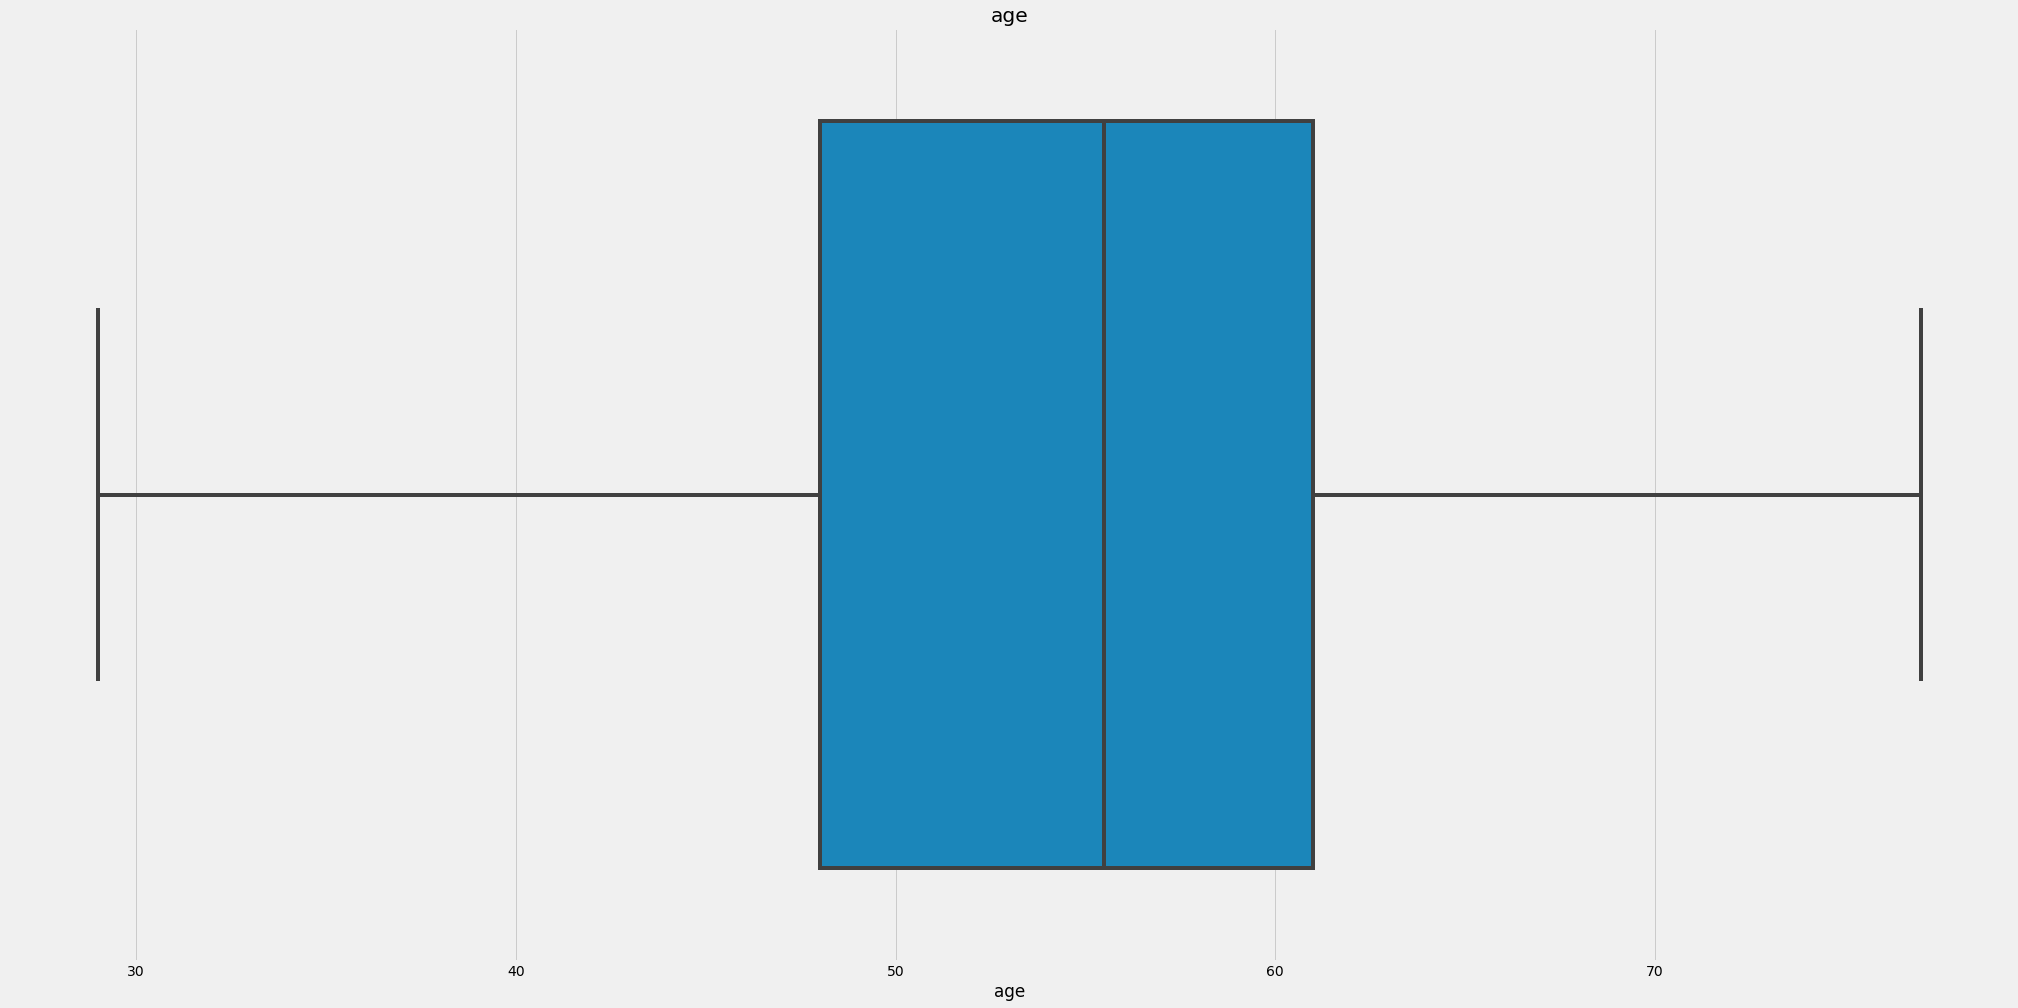

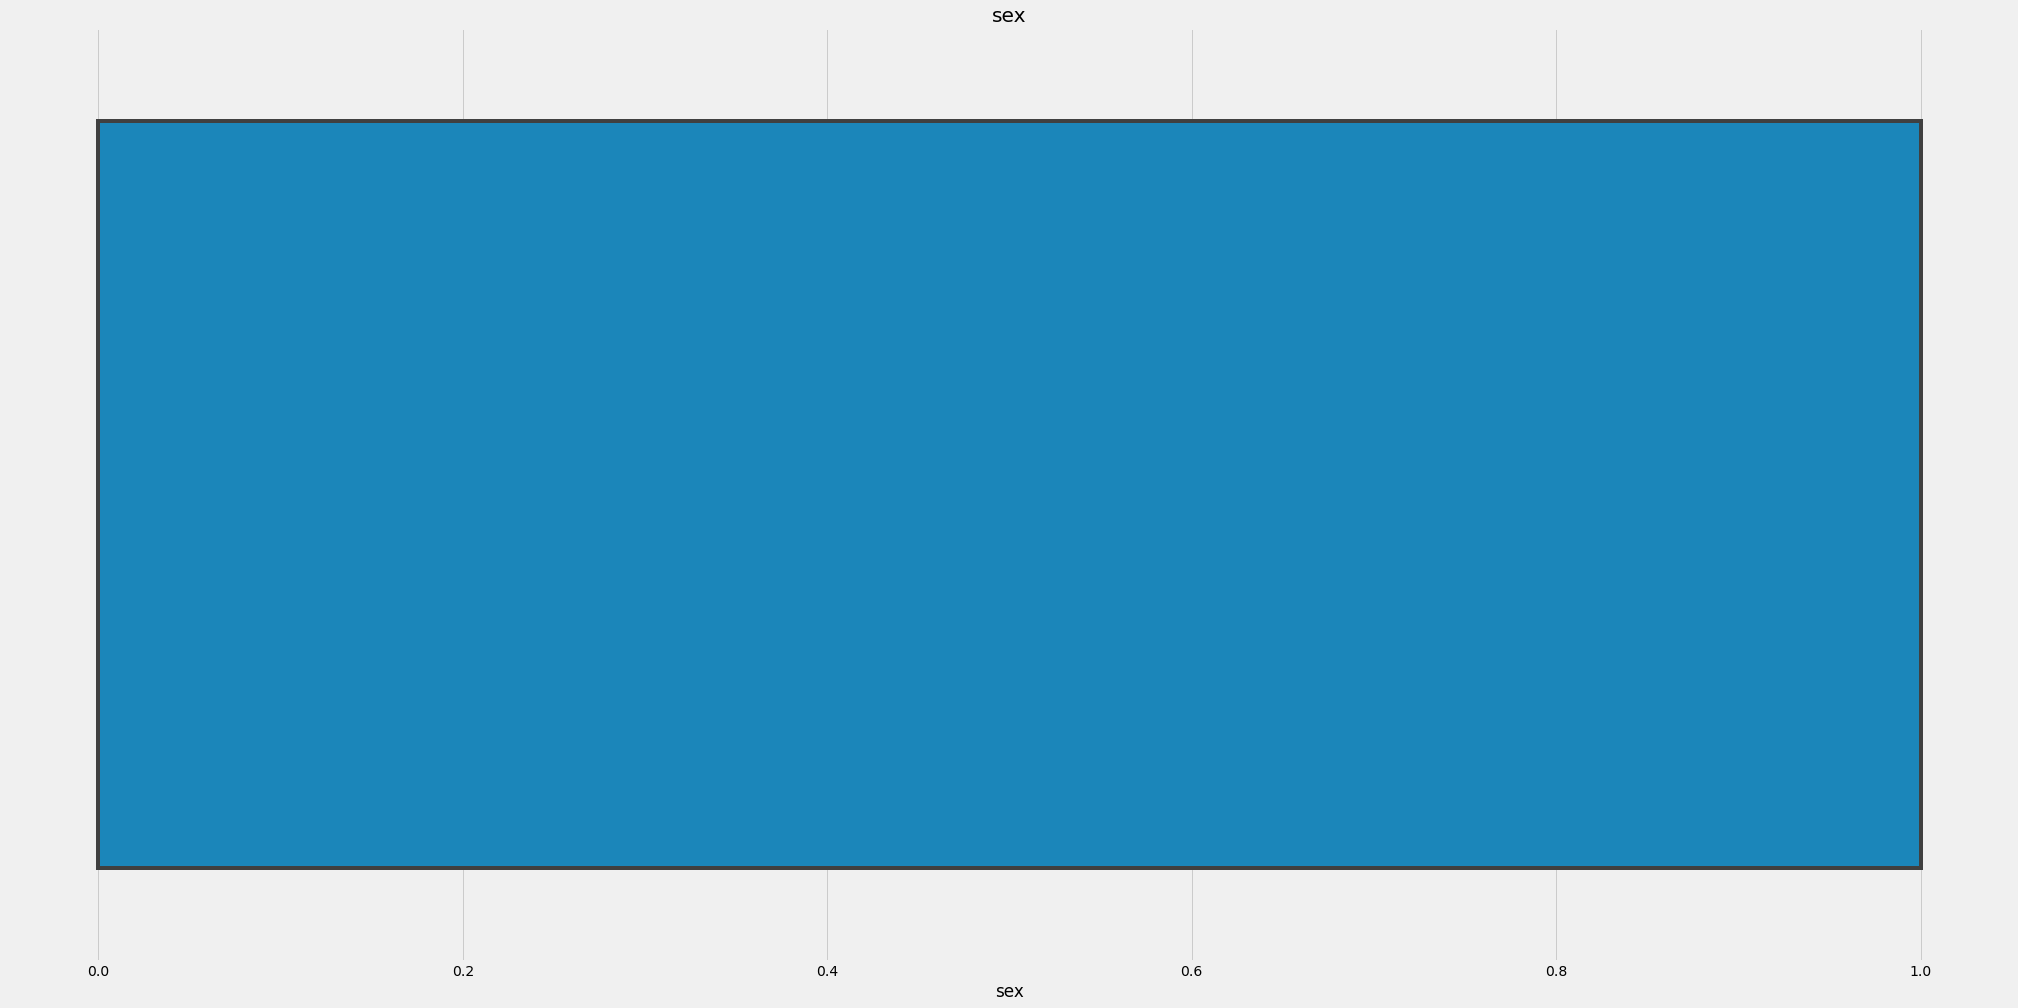

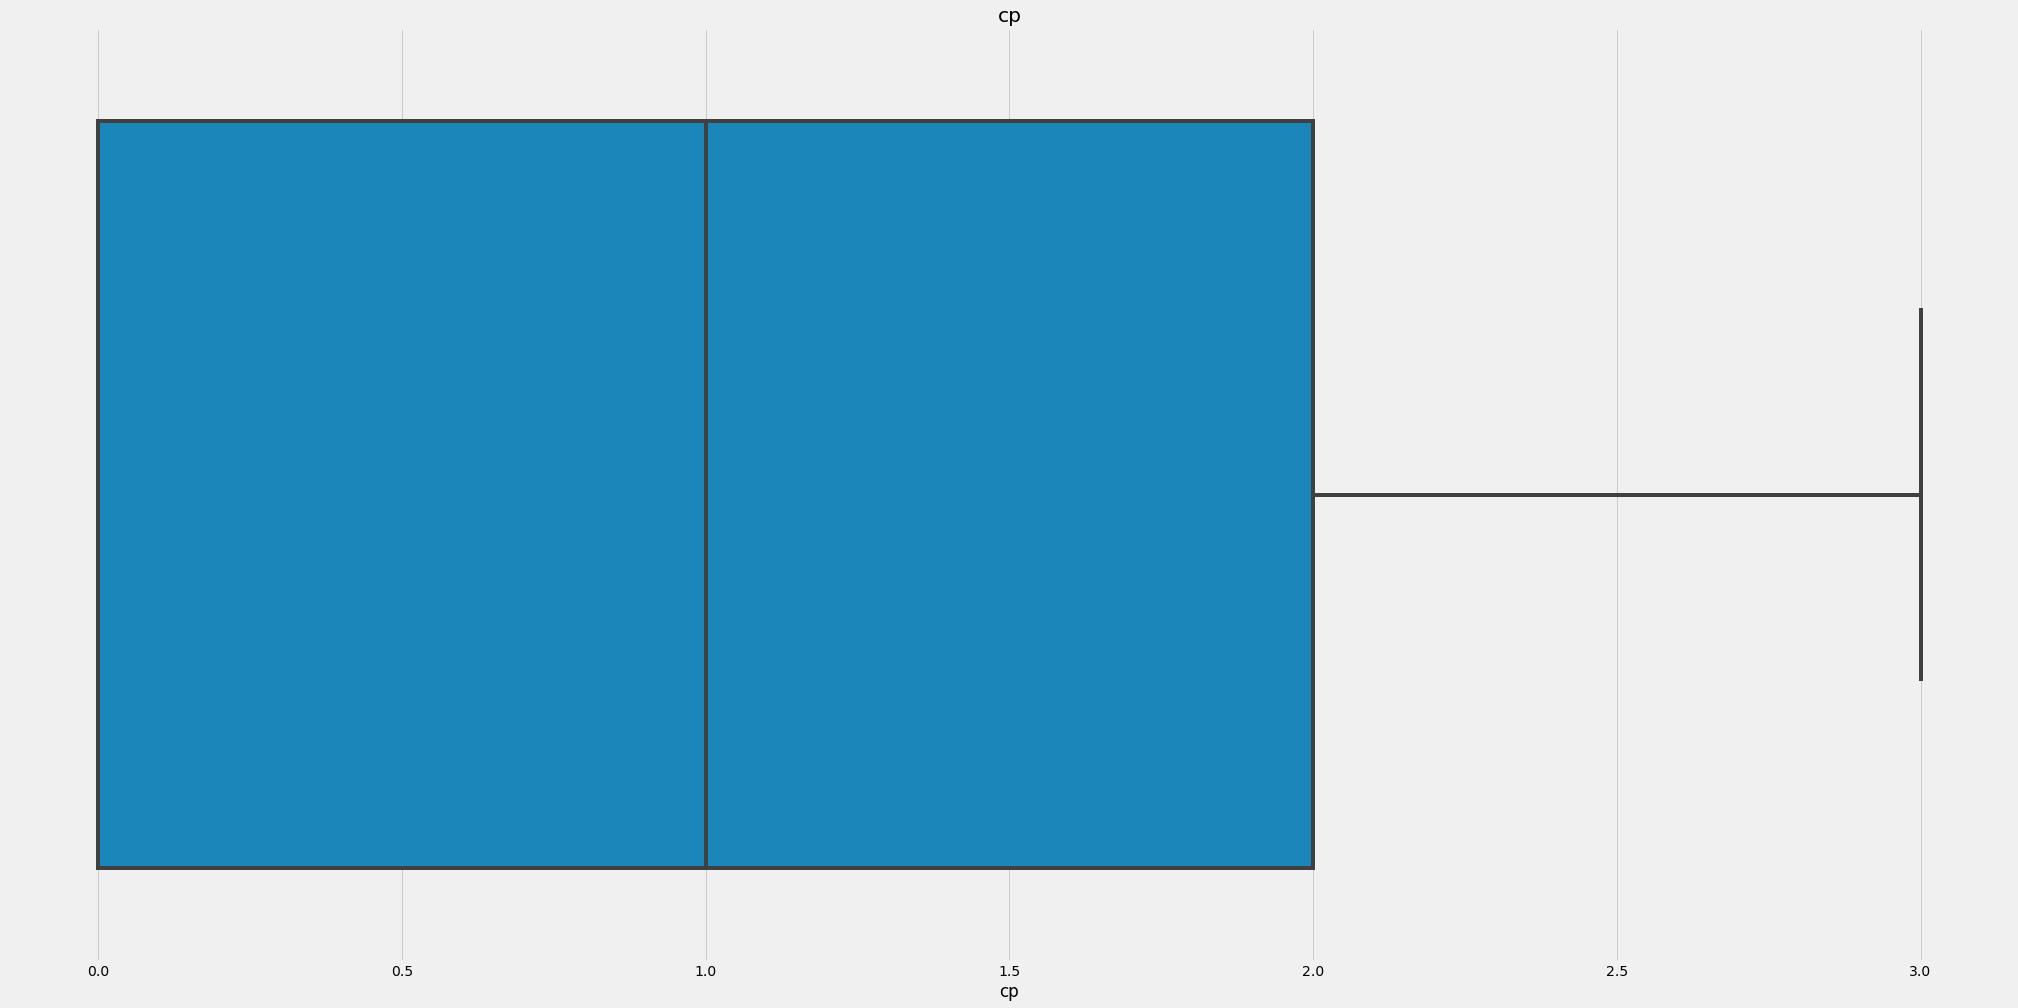

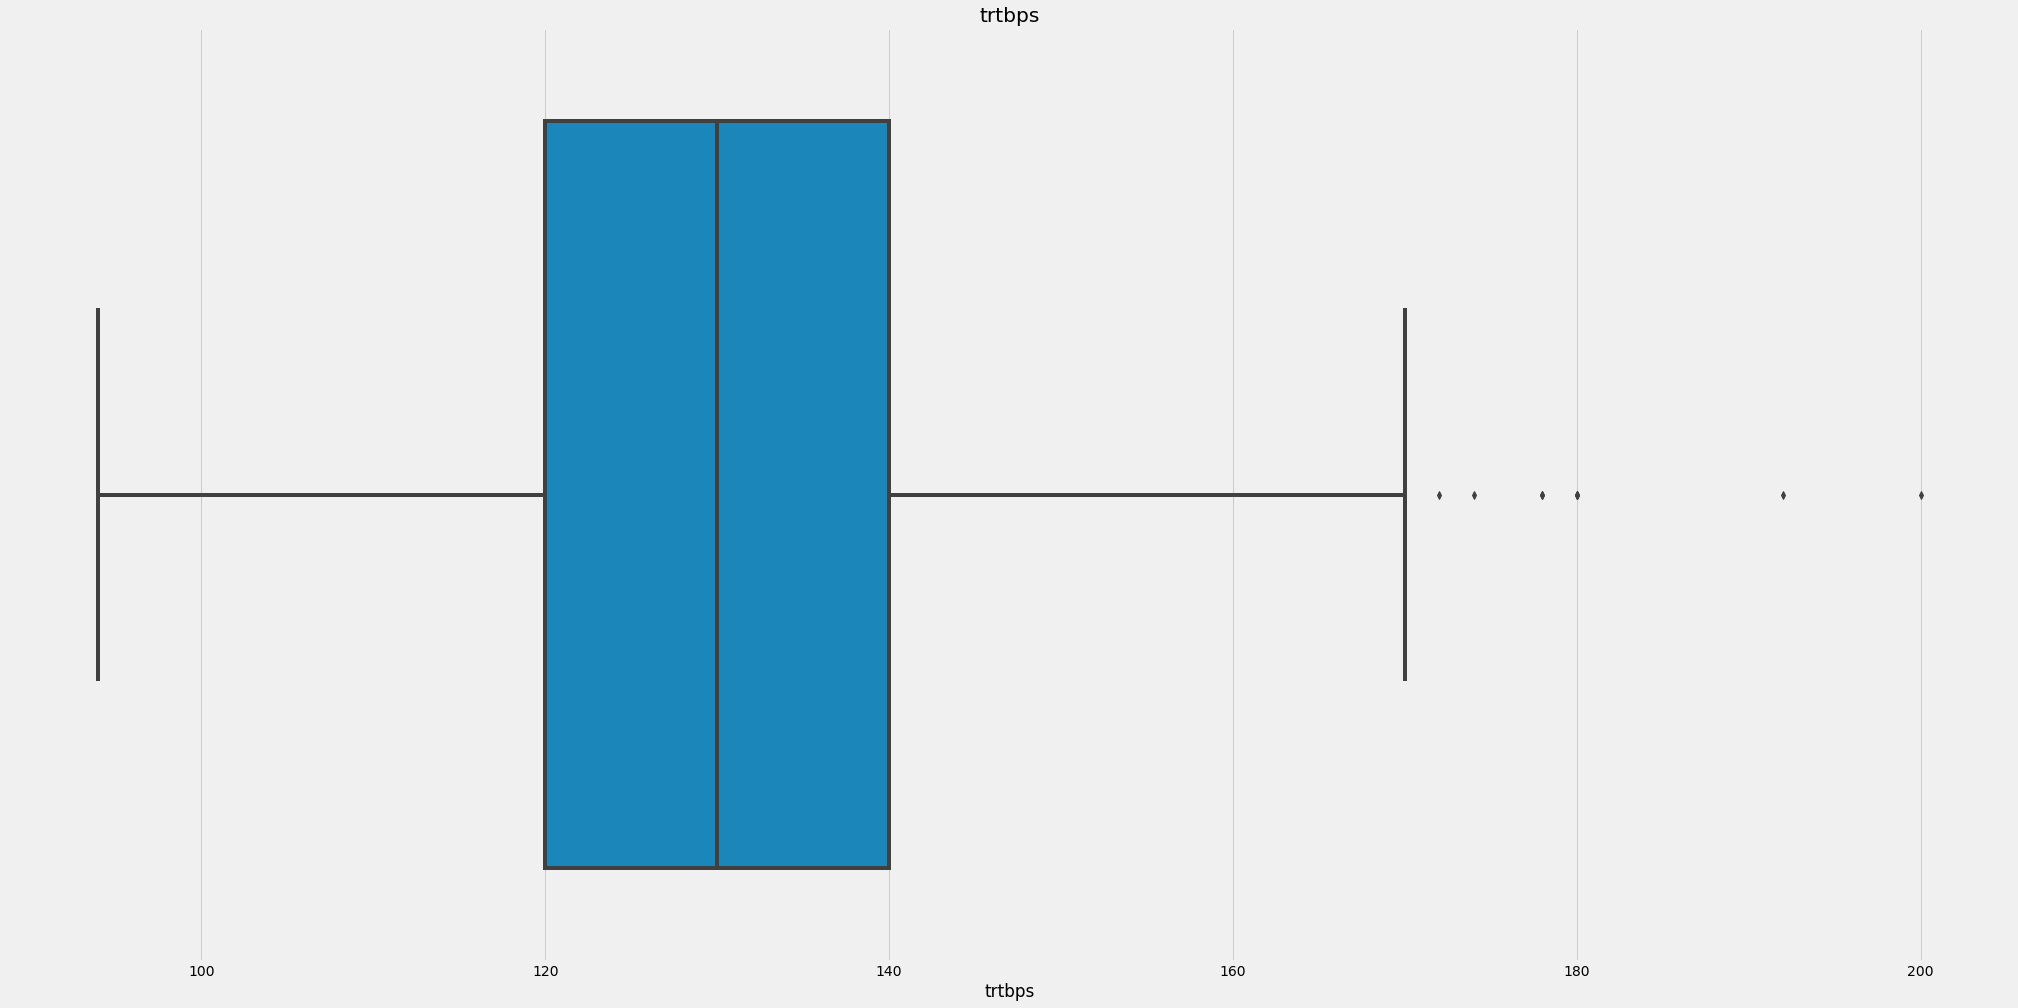

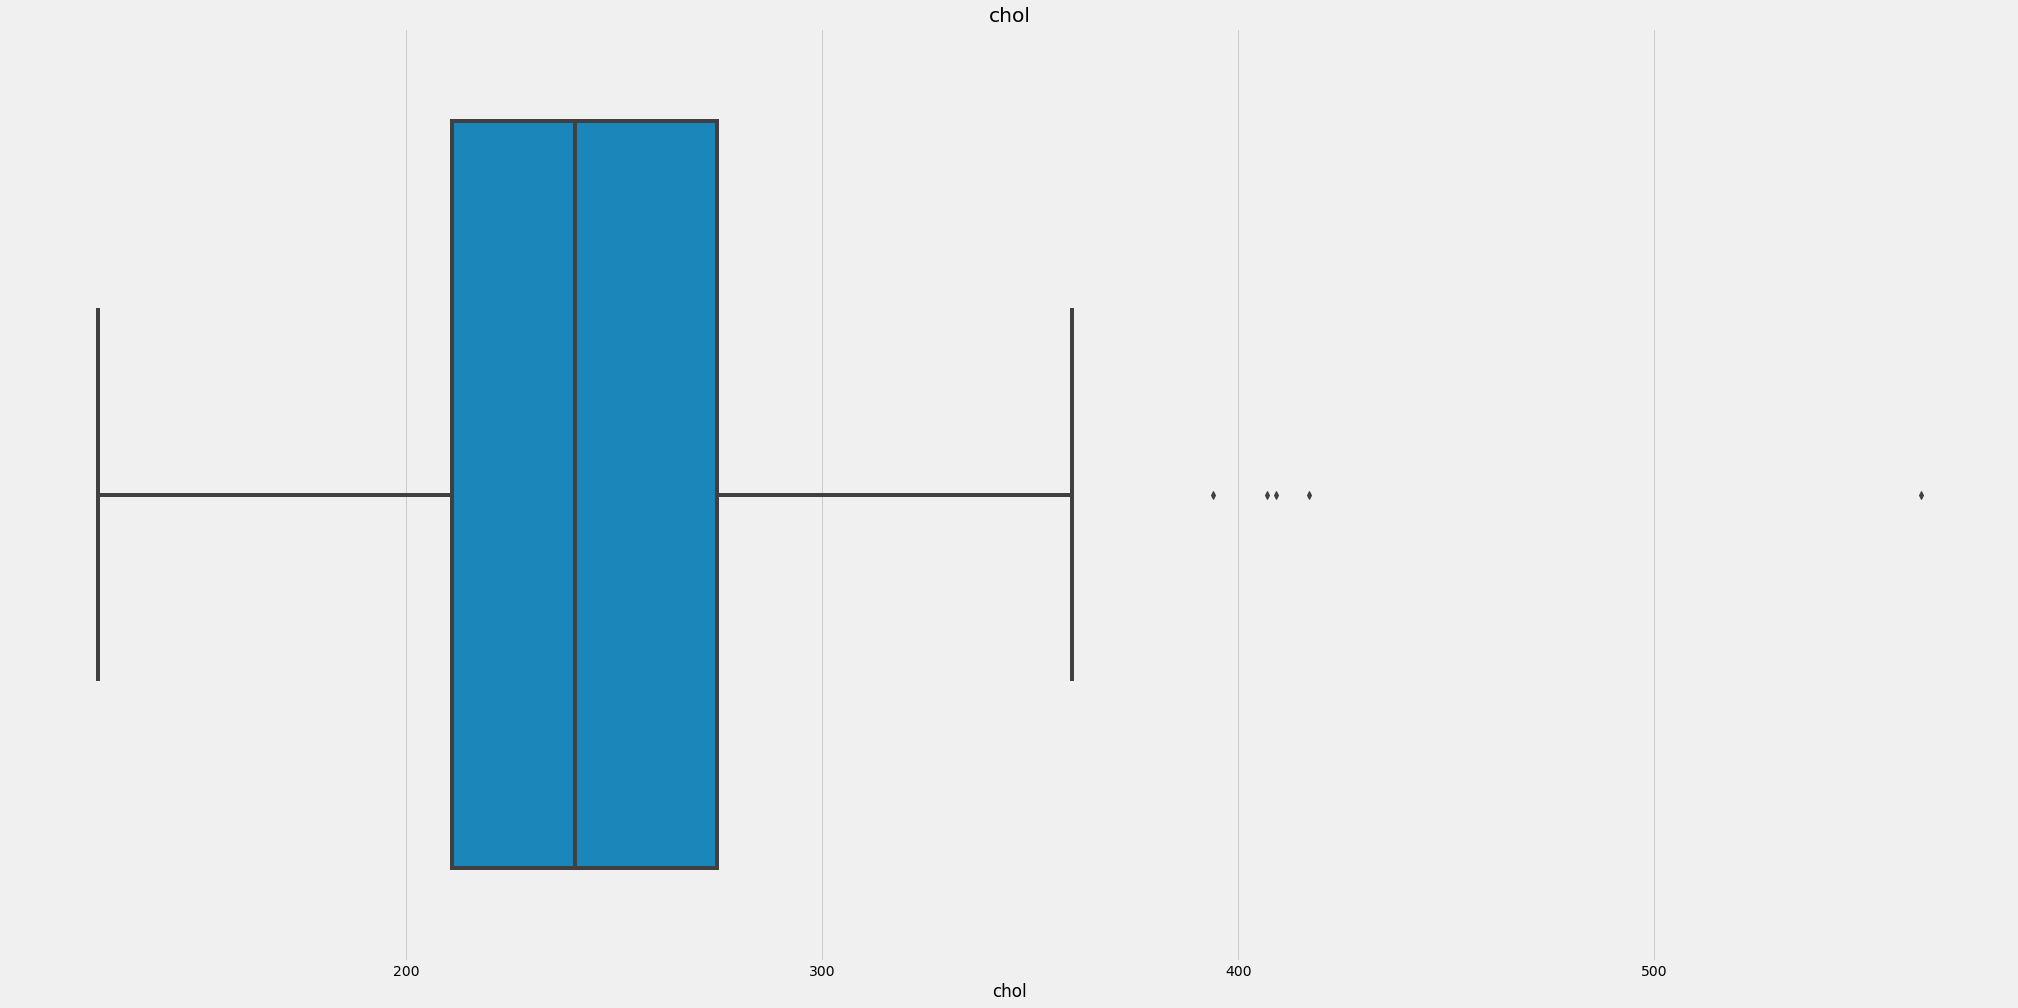

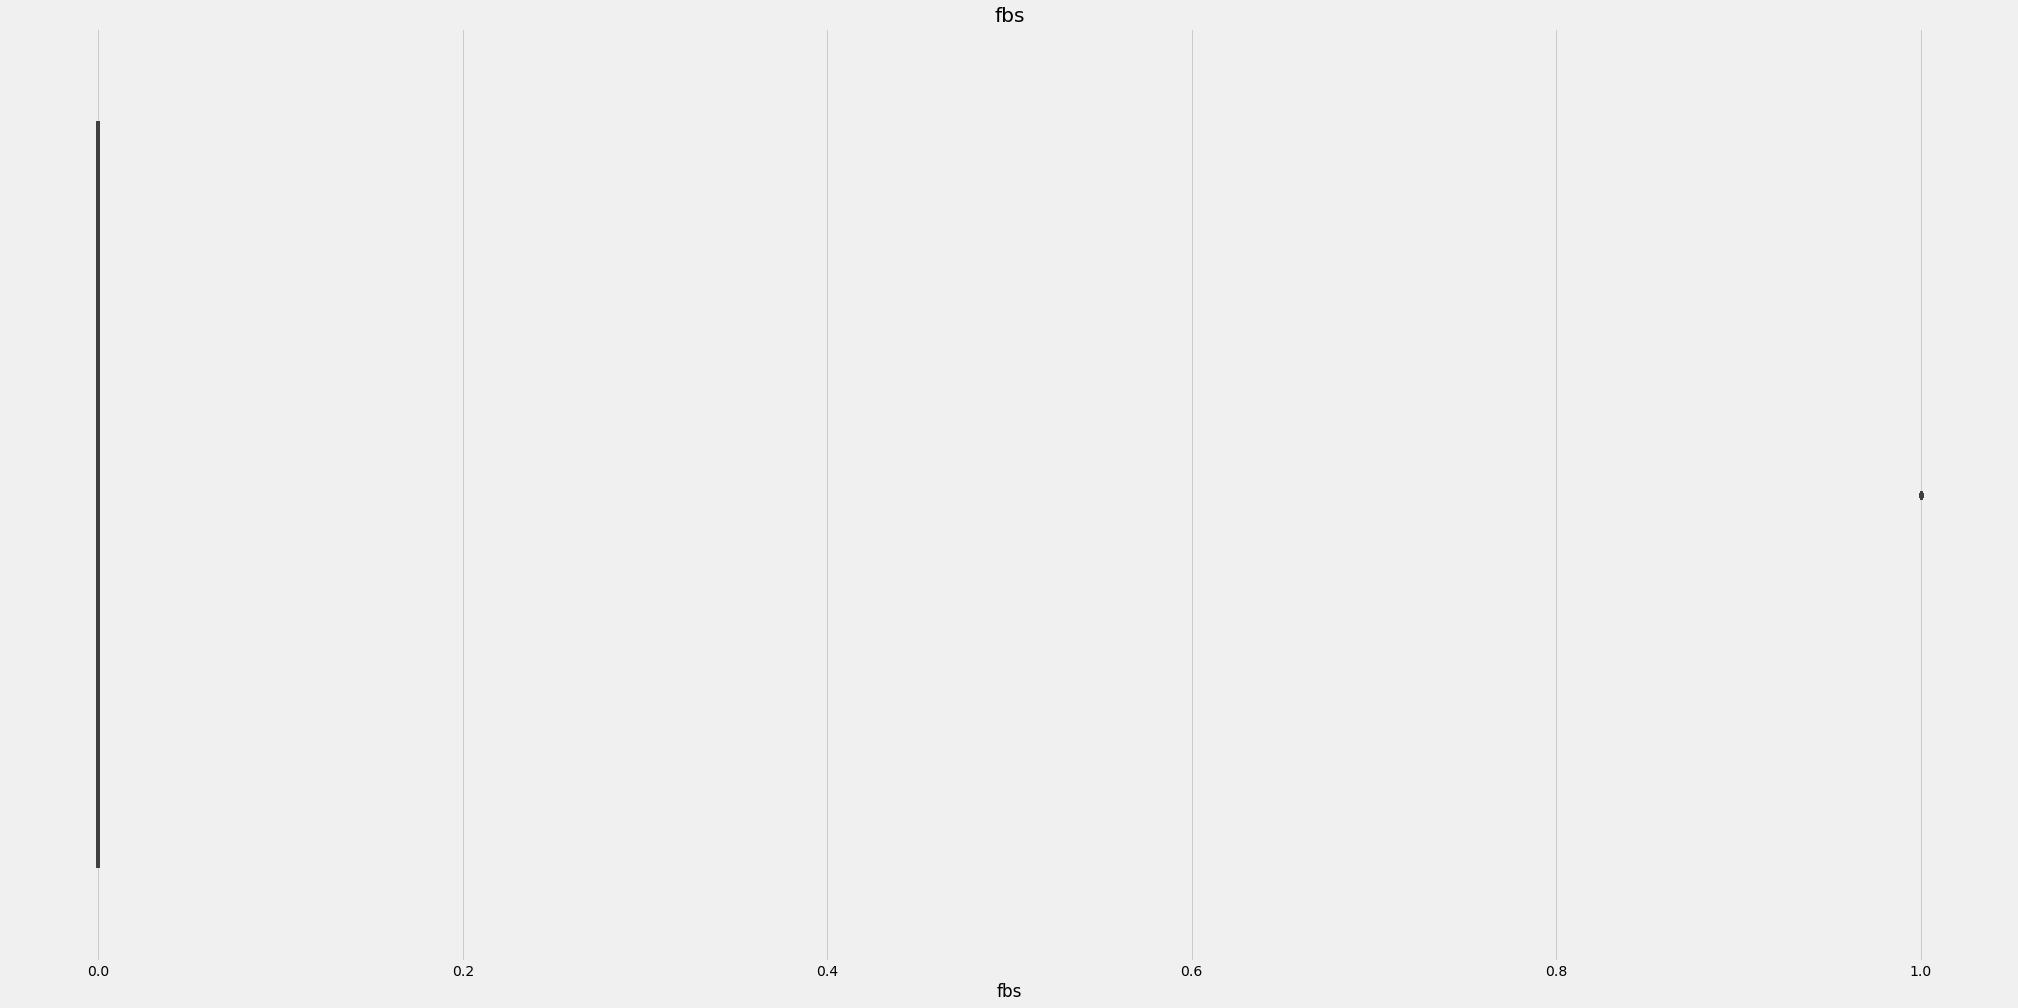

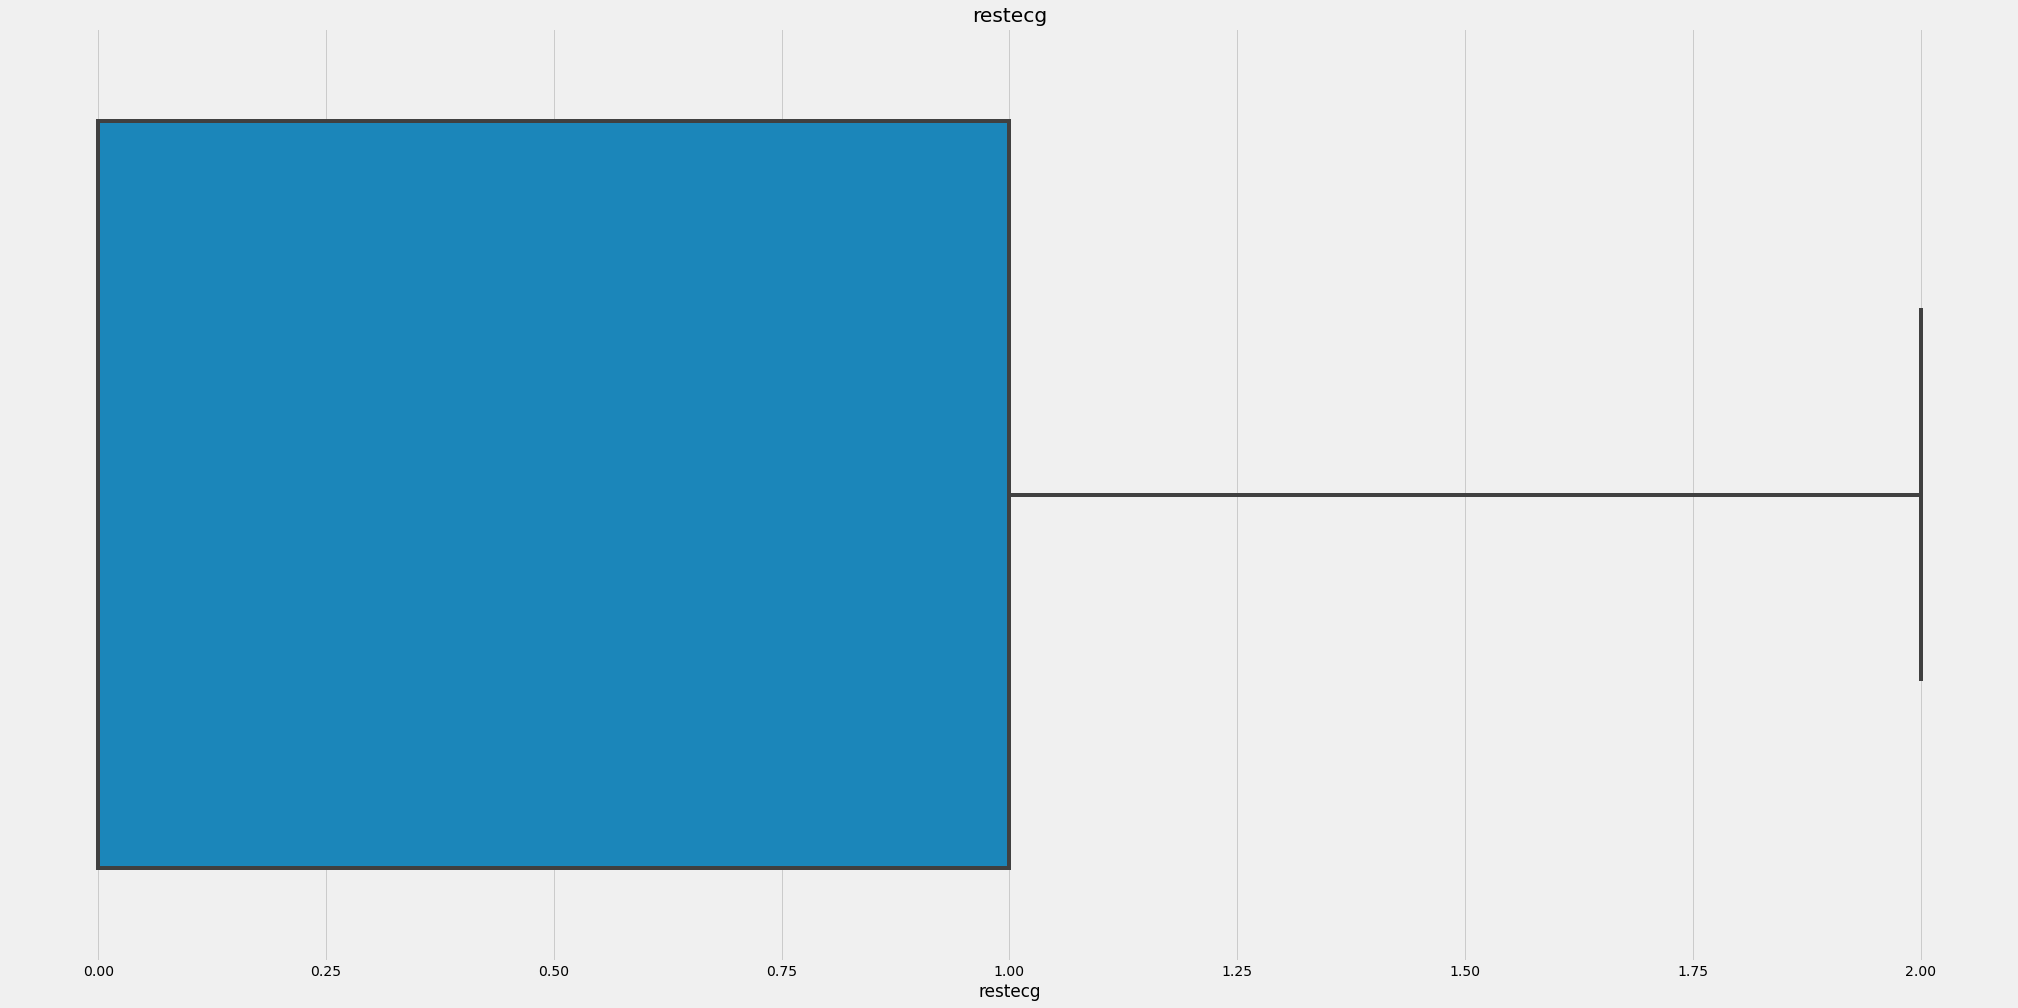

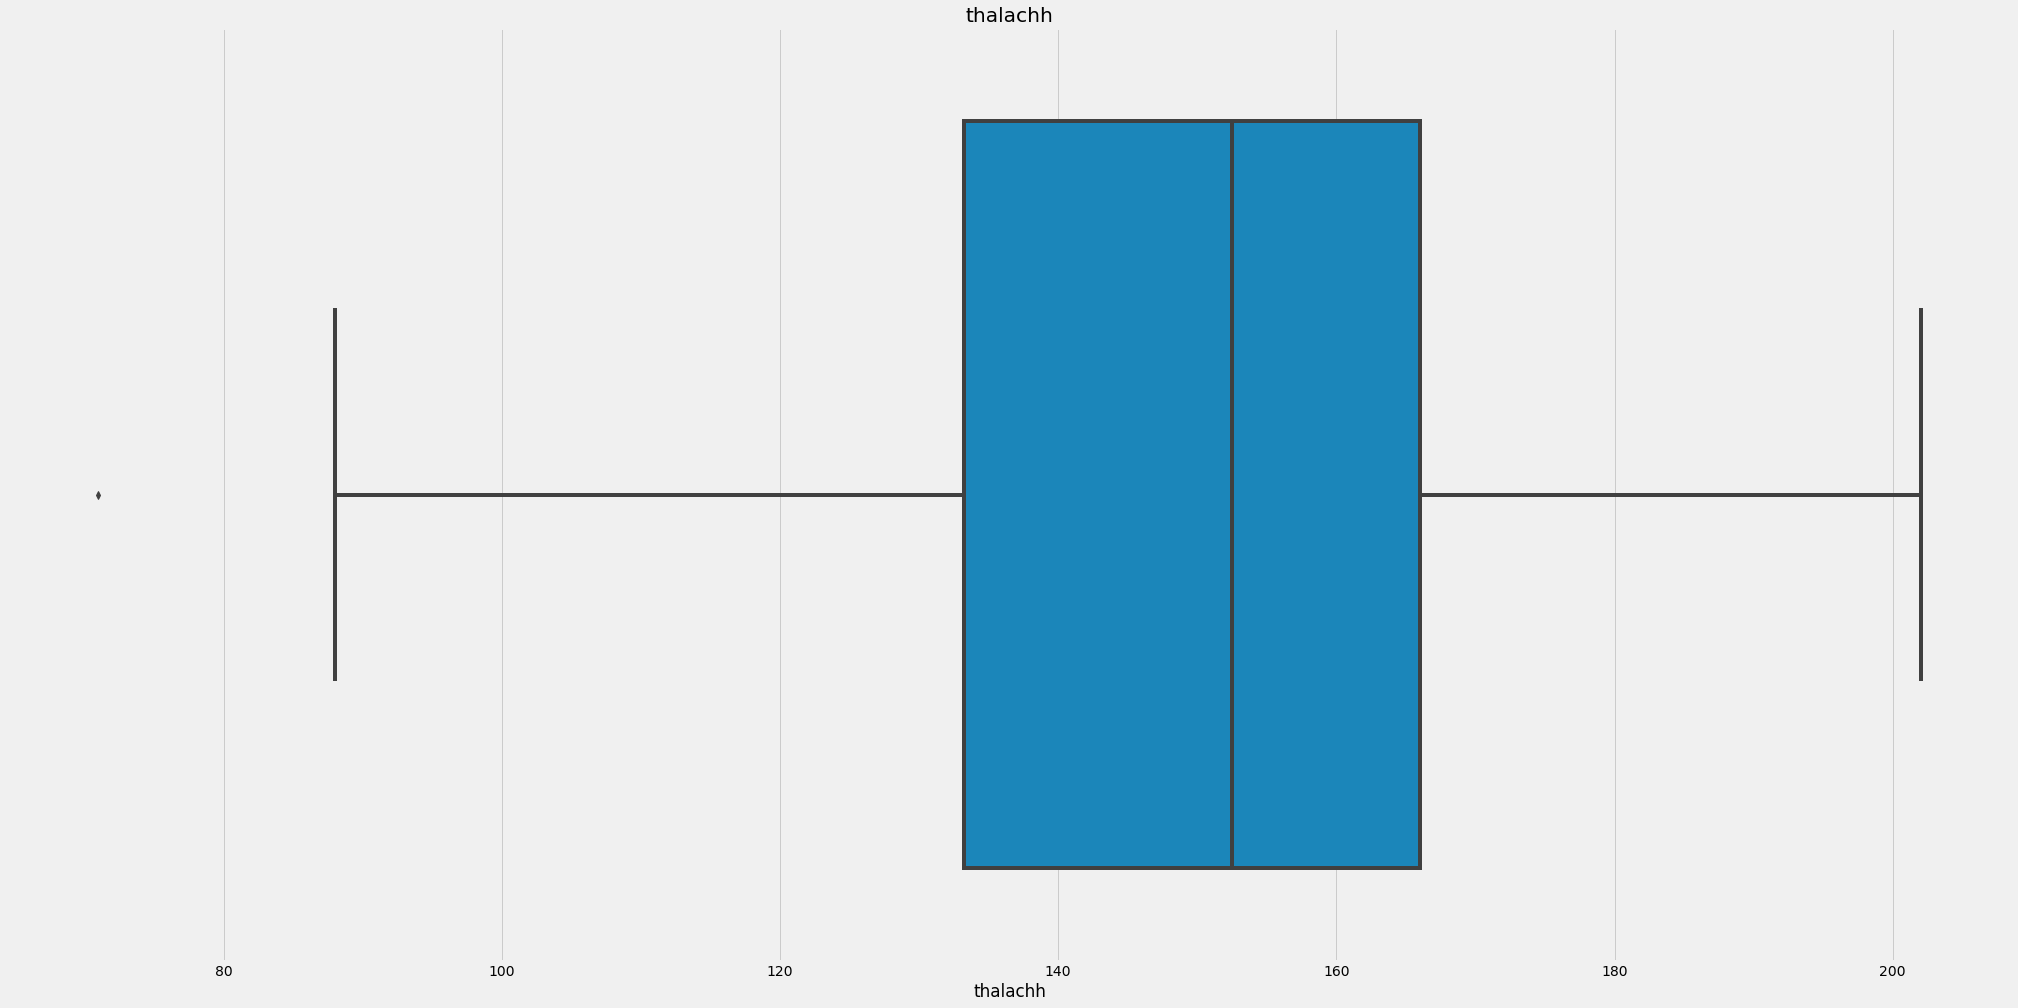

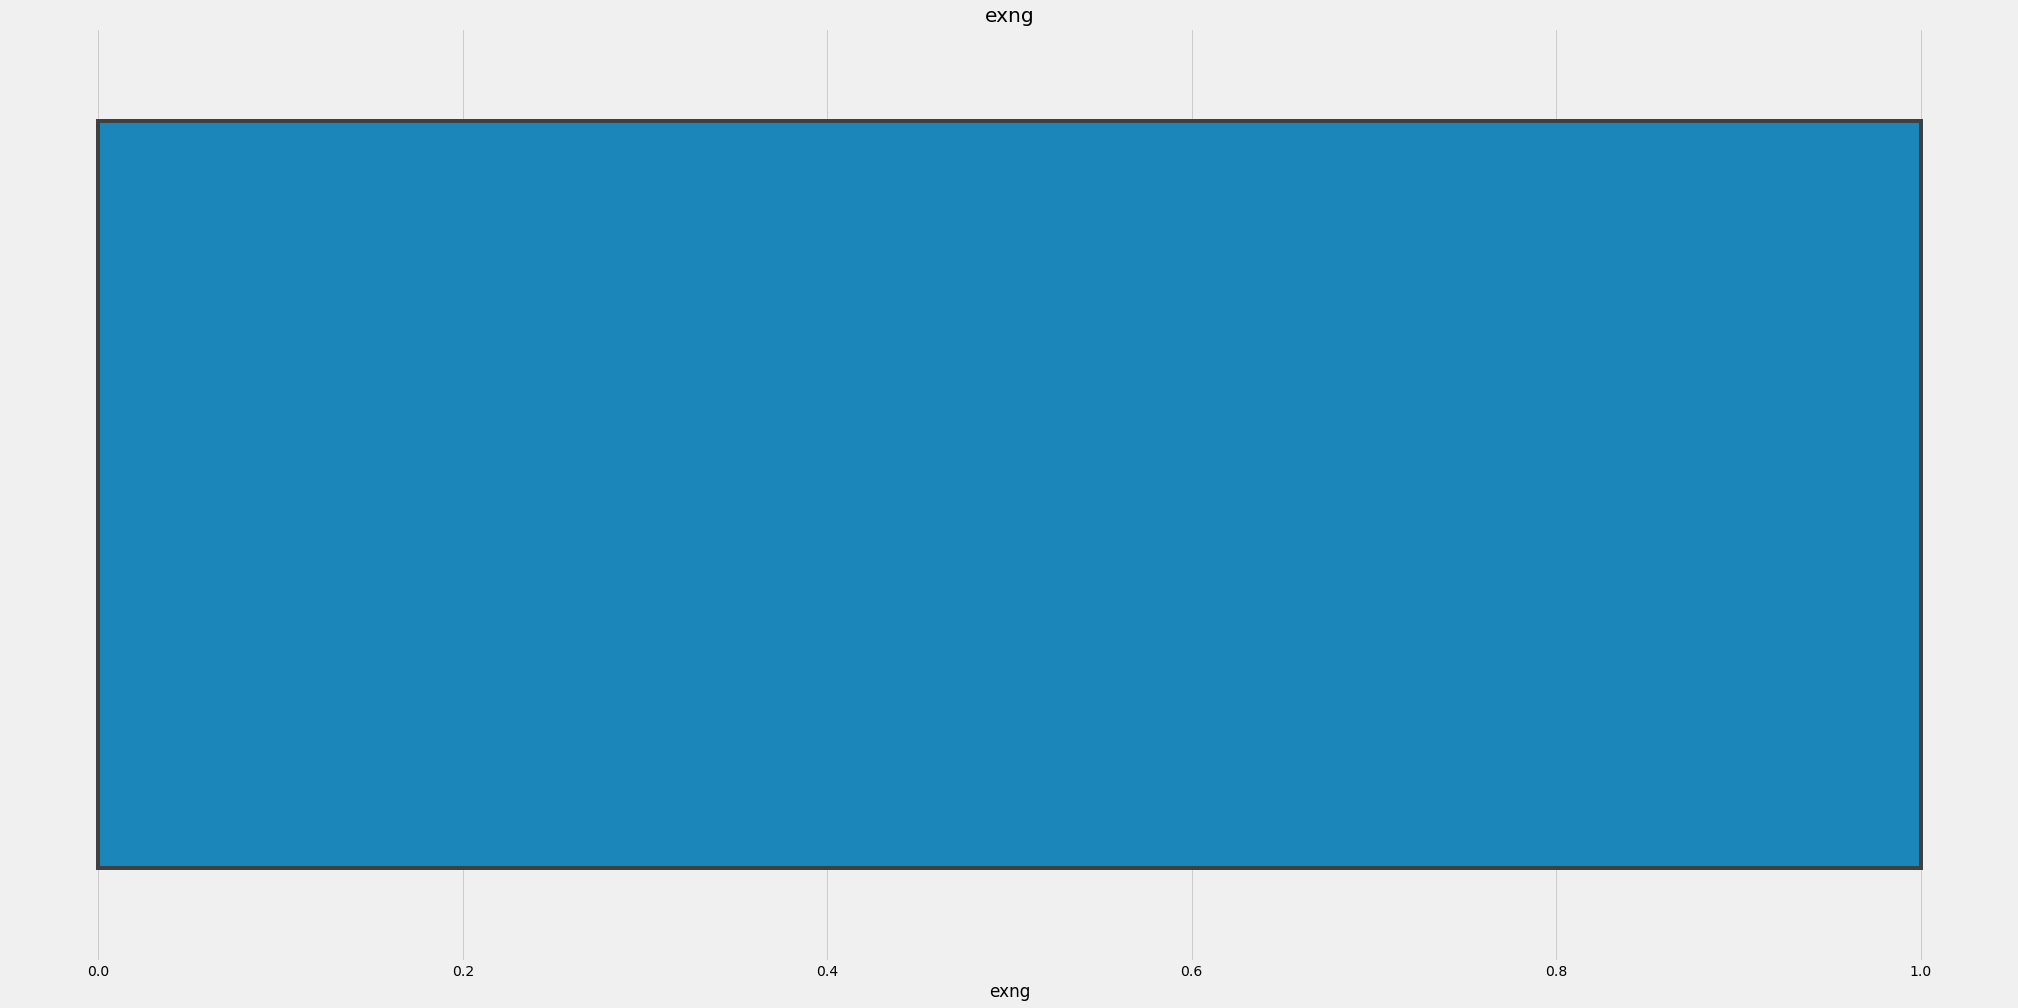

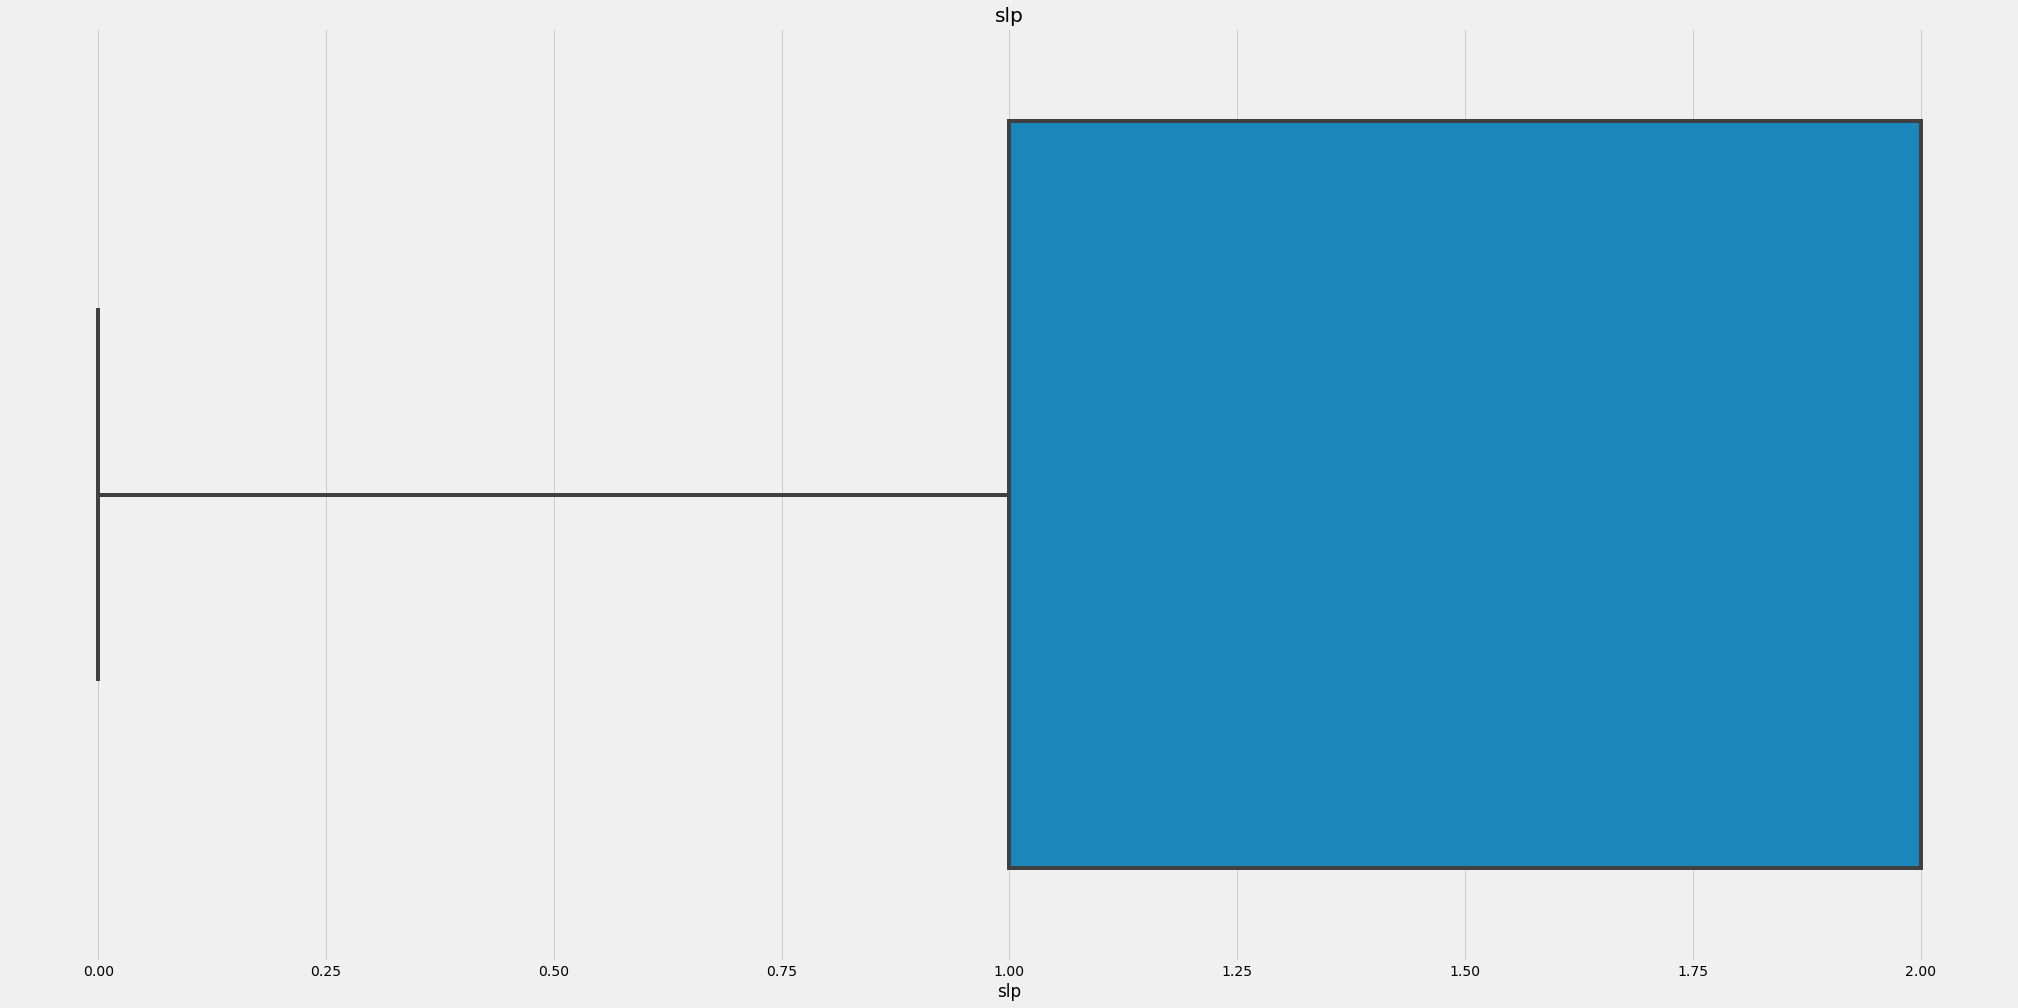

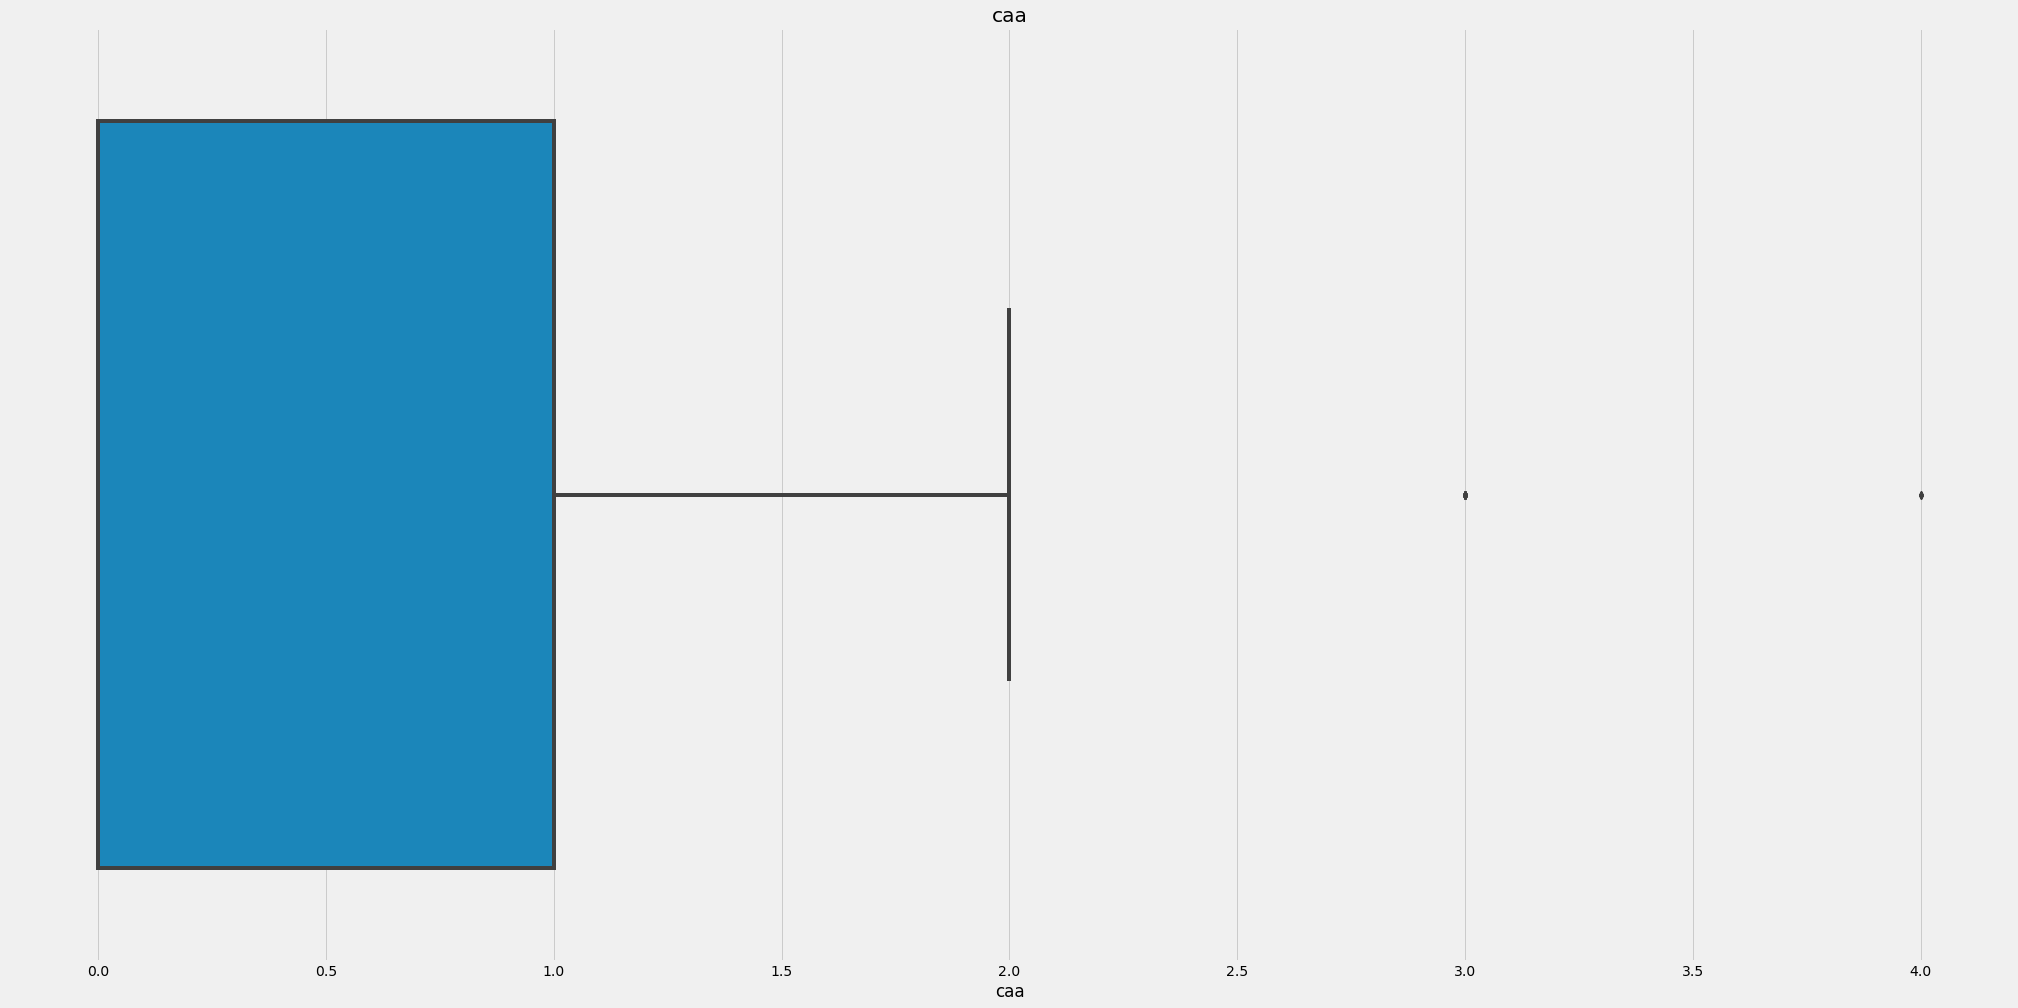

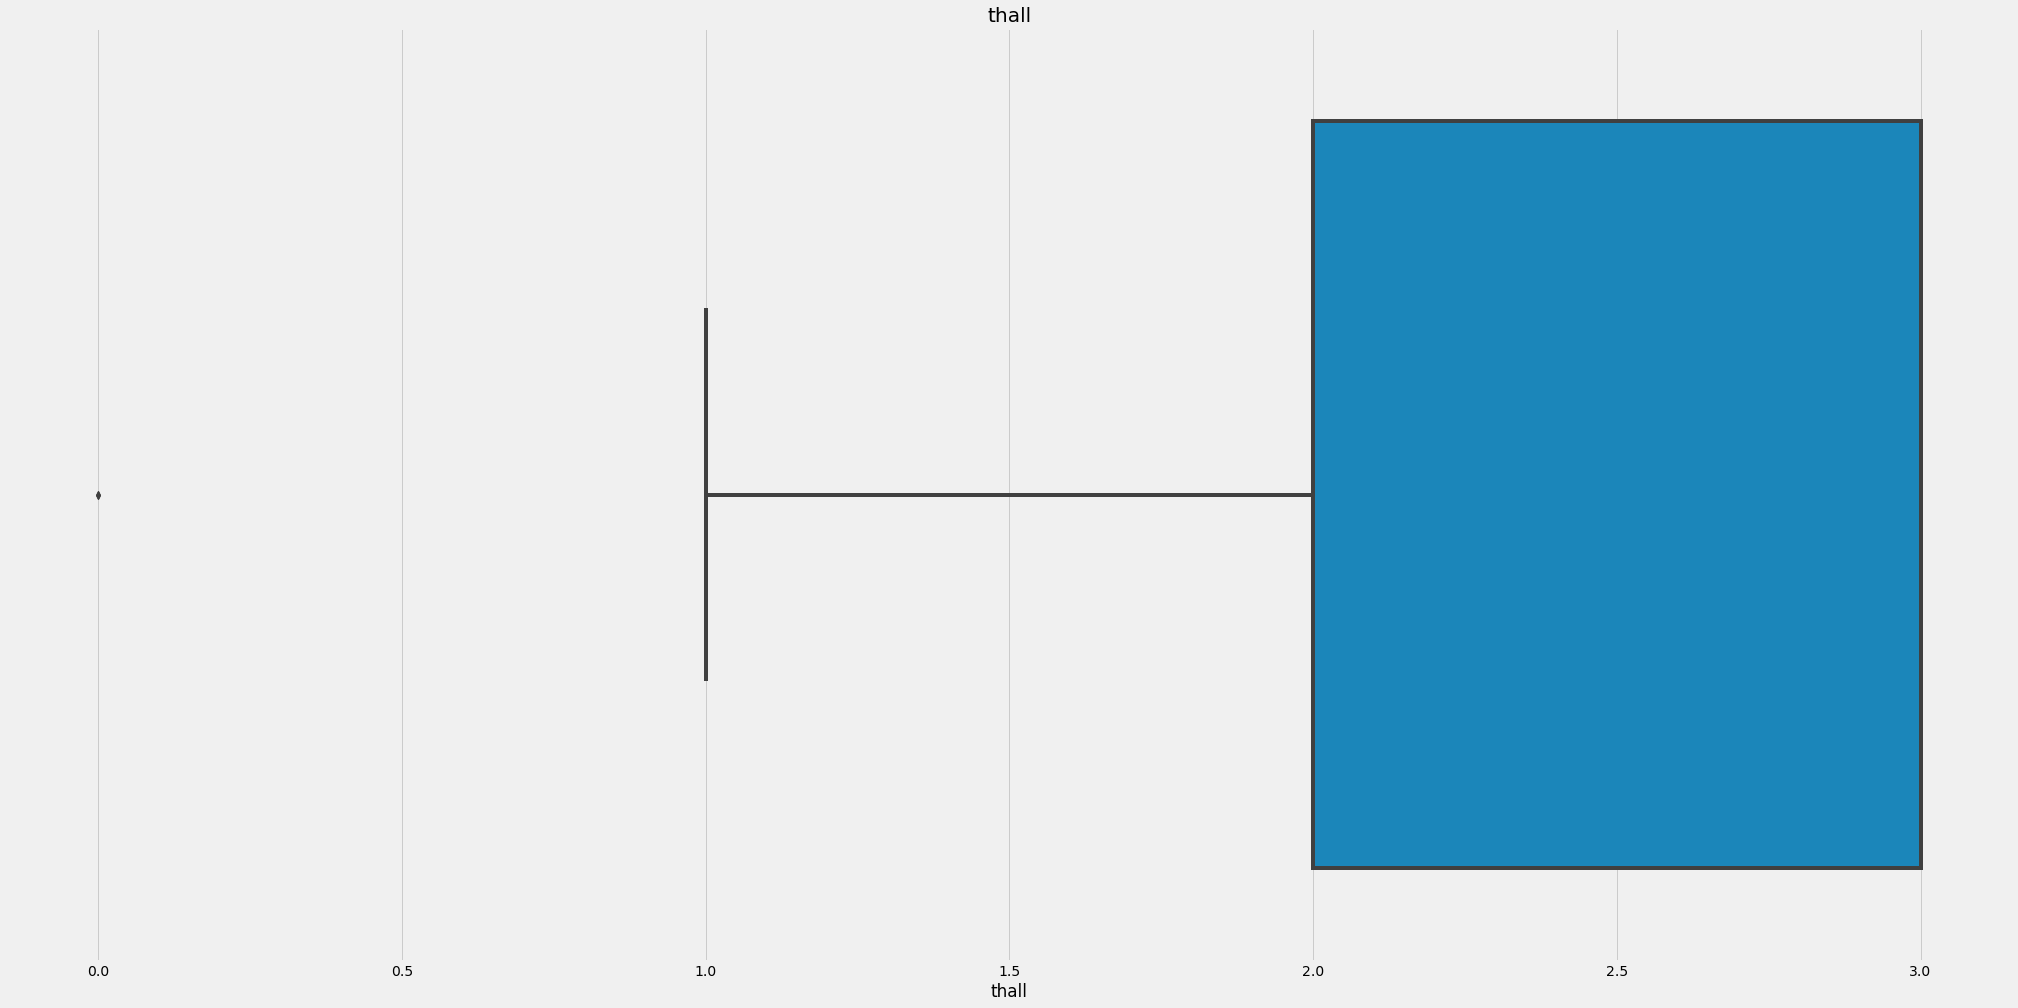

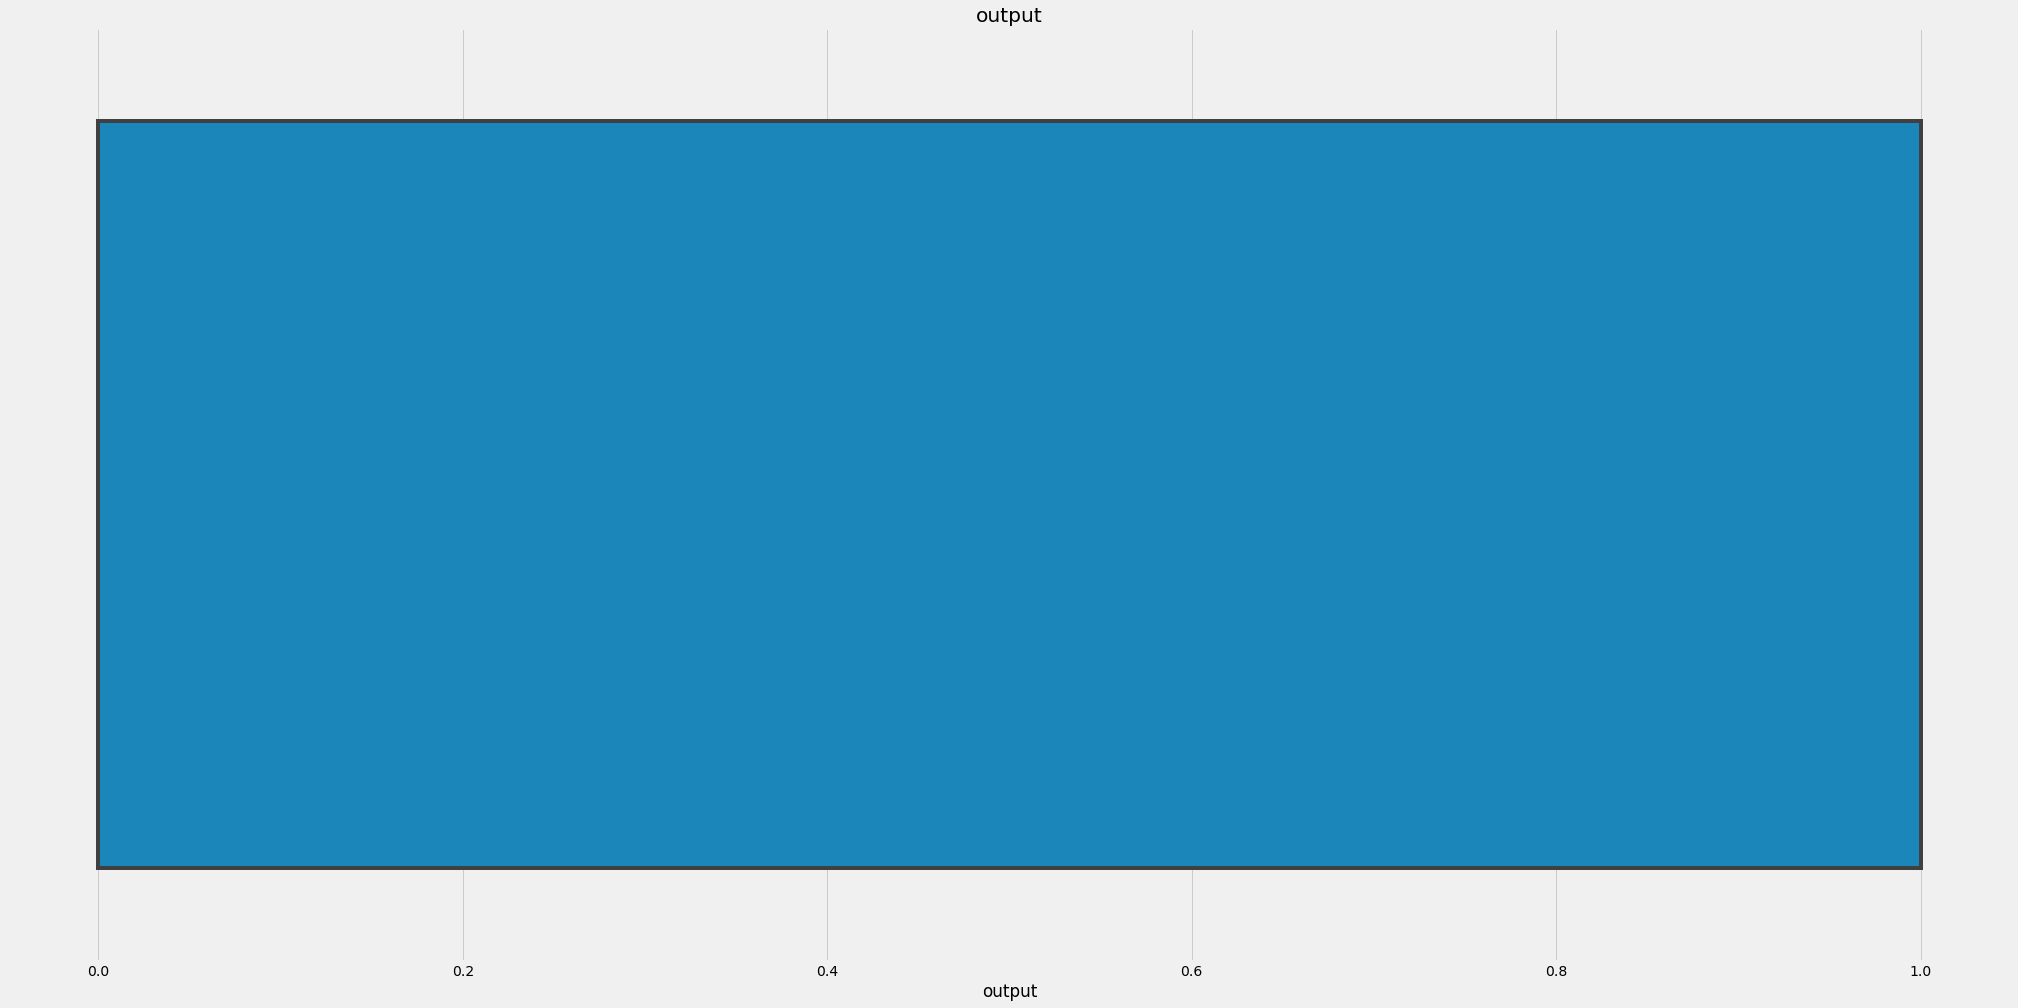

In [20]:
for feature in Hearth.select_dtypes('int64'):
    plt.figure(figsize=(32,16))
    sns.boxplot(x=feature, data=Hearth, hue='output')
    plt.title(feature)
    plt.show()

# Pré-Traitement

In [21]:
del Hearth["fbs"]
del Hearth["chol"]
Hearth = Hearth[Hearth['thalachh'] > 80]
Hearth = Hearth[Hearth['caa'] < 2]
Hearth = Hearth[Hearth['thall'] > 1]
Hearth['age'] = [float(i) for i in Hearth['age']]
Hearth['oldpeak'] = [float(i) for i in Hearth['oldpeak']]
Hearth['thalachh'] = [float(i) for i in Hearth['thalachh']]
Hearth['trtbps'] = [float(i) for i in Hearth['trtbps']]

# X_train, X_test, y_train, y_test

In [22]:
X = Hearth.drop('output', axis=1)
y = Hearth['output']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

In [24]:
len(y_train), len(y_test)

(180, 45)

In [25]:
X_train.head()

age  sex  cp  trtbps  restecg  thalachh  exng  oldpeak  slp  caa  thall
105  68.0    0   2   120.0        0     115.0     0      1.5    1    0      2
116  41.0    1   2   130.0        0     168.0     0      2.0    1    0      2
70   54.0    1   2   120.0        0     147.0     0      0.4    1    0      3
11   48.0    0   2   130.0        1     139.0     0      0.2    2    0      2
224  54.0    1   0   110.0        1     126.0     1      2.8    1    1      3

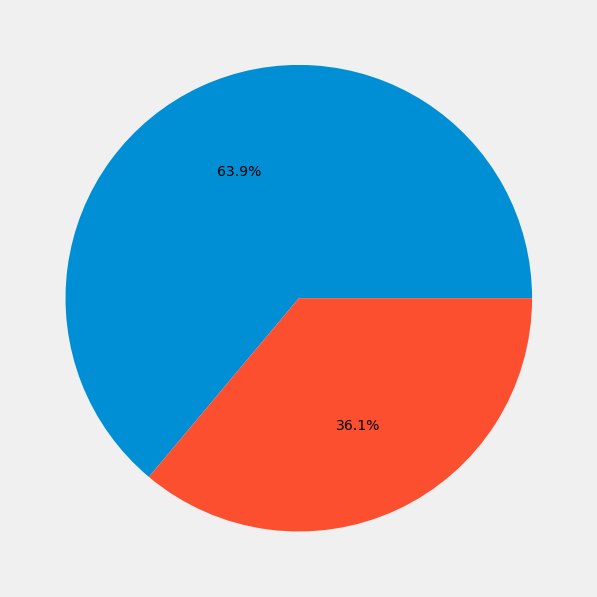

In [26]:
plt.figure(figsize=(18, 10))
plt.pie(y_train.value_counts(), autopct='%1.1f%%')
plt.show()

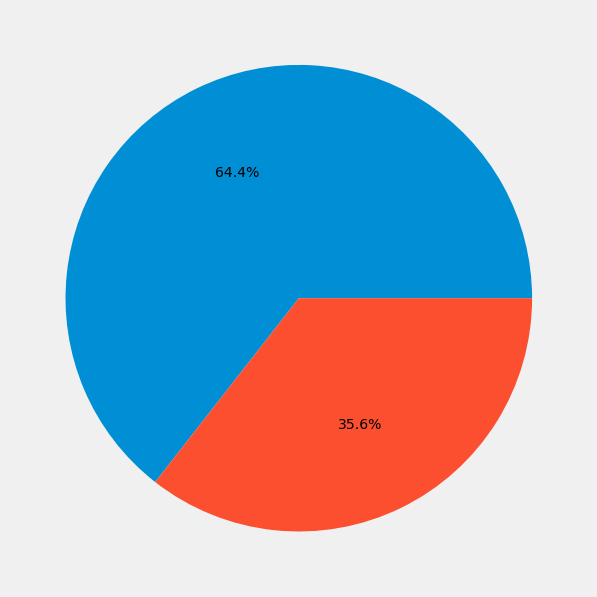

In [27]:
plt.figure(figsize=(18, 10))
plt.pie(y_test.value_counts(), autopct='%1.1f%%')
plt.show()

In [28]:
cat_features = Hearth.select_dtypes("int64").columns
cont_features = Hearth.select_dtypes(include=['float64']).columns

imput_cont = SimpleImputer(missing_values=np.nan, strategy='mean')
imput_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for feature in cont_features :
    Hearth[feature] = imput_cont.fit_transform(Hearth[feature].values.reshape(-1,1)).ravel()
for feature in cat_features :
    Hearth[feature] = imput_cat.fit_transform(Hearth[feature].values.reshape(-1,1)).ravel()

In [29]:
scale_minmax = MinMaxScaler()
scale_robust = RobustScaler()
# normaliser les données d'entrainement
for feature in cont_features:
    X_train[feature] = scale_minmax.fit_transform(X_train[feature].values.reshape(-1,1)).ravel()

In [30]:
# normaliser les donnéees de test
for feature in cont_features:
    X_test[feature] = scale_minmax.fit_transform(X_test[feature].values.reshape(-1,1)).ravel()

In [31]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=1206)

# Do the process
X_train_up, y_train_up = smt.fit_resample(X_train, y_train)

# Modélisation prédictive

In [32]:
# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression

# models
logreg = LogisticRegression(penalty='none')
logregRidge = LogisticRegression(penalty='l2')
logregLasso = LogisticRegression(penalty='l1', solver='saga')
logregElasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.9)

In [33]:
dict_models = {"Reression logistique": logreg,
              "Regression logistique + Ridge": logregRidge,
              "Regression logistique + Lasso": logregLasso,
              "Regression logistique + Elastic Net": logregElasticNet
              }

# Prédiction et Evaluation

Régression logistique

Matrice de confusion:
[[14  2]
 [ 3 26]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.93      0.90      0.91        29

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45
 

Exactitude: 88.888889 



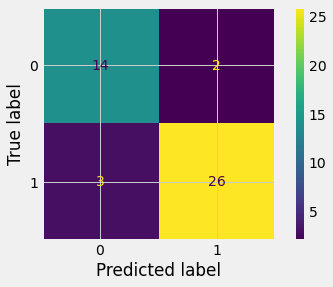

In [34]:
## régression logistique
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

Régression logistique + Ridge

Matrice de confusion:
[[14  2]
 [ 2 27]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.93      0.93      0.93        29

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.91      0.91      0.91        45
 

Exactitude: 91.111111 



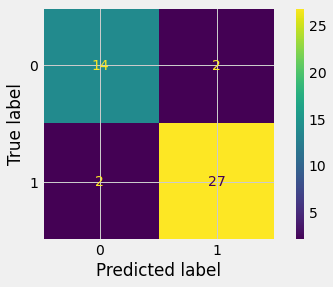

In [35]:
## régression logistique + ridge
logregRidge.fit(X_train_up, y_train_up)
y_pred = logregRidge.predict(X_test)

print('='*30)
print('Régression logistique + Ridge')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logregRidge, X_test, y_test)
plt.show()

Régression logistique + Lasso

Matrice de confusion:
[[14  2]
 [ 2 27]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.93      0.93      0.93        29

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.91      0.91      0.91        45
 

Exactitude: 91.111111 



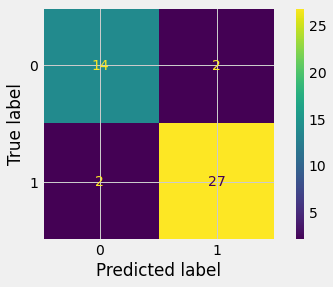

In [36]:
## régression logistique + Lasso
logregLasso.fit(X_train_up, y_train_up)
y_pred = logregLasso.predict(X_test)

print('='*30)
print('Régression logistique + Lasso')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logregLasso, X_test, y_test)
plt.show()

Régression logistique + Elastic Net

Matrice de confusion:
[[14  2]
 [ 2 27]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.93      0.93      0.93        29

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.91      0.91      0.91        45
 

Exactitude: 91.111111 



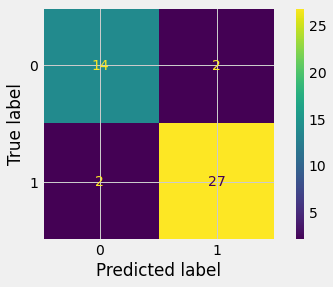

In [37]:
## régression logistique + elasticnet
logregElasticNet.fit(X_train_up, y_train_up)
y_pred = logregElasticNet.predict(X_test)

print('='*35)
print('Régression logistique + Elastic Net')
print('='*35, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logregElasticNet, X_test, y_test)
plt.show()

In [39]:
# aire sous la courbe
roc_auc_score(y_test, y_pred)

0.9030172413793103

In [43]:
N, train_score, val_score = learning_curve(logregElasticNet, X_train, y_train,
                                            cv=5,
                                            train_sizes=np.linspace(0.1, 1, 10))

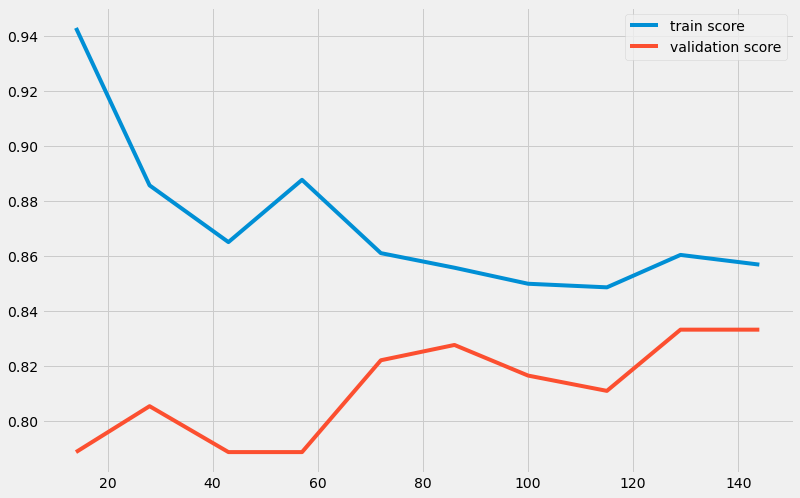

In [44]:
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

# Réglage des hypervariables

In [ ]:
## régression logistique
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensibilite = TP / float(TP+FN)
specificite = TN / float(TN+FP)

In [ ]:
print('Exactitude = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Erreur de classification= 1- Exactitude= ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensibilité (True Positive Rate) = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificité (True Negative Rate) = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Précision (Positive Predictive value) = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n')

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob de mort (0)','Prob de survie (1)'])
y_pred_prob_df.head()

In [ ]:
param_grid = {'C': [1, 10, 100, 1000], 'max_iter': range(100)}
grid = GridSearchCV(logreg, param_grid, verbose=10, n_jobs=1, return_train_score=True)
# attention n_jobs=-1 va utiliser tous les CPUs
grid.fit(X_train_up, y_train_up)

In [ ]:
grid.best_params_

In [ ]:
grid_logreg = grid.best_estimator_

In [ ]:
predictions = grid_logreg.fit(X_train, y_train)

In [ ]:
grid_logreg.score(X_train, y_train)

In [ ]:
grid_logreg.score(X_test, y_test)

In [ ]:
# performance de régression logistique avec GridSearchCV
y_pred = grid_logreg .predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()